# TELECOM CHURN CASE STUDY
### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Steps to build the model:

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

In [323]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the data and cleaning

In [324]:
# Importing the telecom churn file
telchurn = pd.read_csv("telecom_churn_data.csv",sep=',', encoding='cp437')
telchurn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [325]:
telchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [326]:
telchurn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [327]:
# Fiding columns with zero mean
cols = telchurn.select_dtypes(exclude=['object'])
def zero_mean(x):
    if telchurn[x].mean()==0:
        return x
    else:
        return ""
cols_zero = ""    
for i in cols:
    if zero_mean(i) != "":
        cols_zero = cols_zero + "," + zero_mean(i)
cols_zero = cols_zero.strip(",")
cols_zero_list = cols_zero.split (",")  
print(cols_zero_list)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [328]:
# Dropping columns with zero mean
telchurn1 = telchurn.drop(cols_zero_list, axis=1)
telchurn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 215 entries, mobile_number to sep_vbc_3g
dtypes: float64(168), int64(35), object(12)
memory usage: 164.0+ MB


In [329]:
telchurn1.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7  \
0     7000842753        109            6/30/2014            7/31/2014   
1     7001865778        109            6/30/2014            7/31/2014   
2     7001625959        109            6/30/2014            7/31/2014   
3     7001204172        109            6/30/2014            7/31/2014   
4     7000142493        109            6/30/2014            7/31/2014   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0            8/31/2014            9/30/2014  197.385  214.816  213.803   
1            8/31/2014            9/30/2014   34.047  355.074  268.321   
2            8/31/2014            9/30/2014  167.690  189.058  210.226   
3            8/31/2014            9/30/2014  221.338  251.102  508.054   
4            8/31/2014            9/30/2014  261.636  309.876  238.174   

    arpu_9  ...  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  \
0   21.100  ...            0        1.0        1.0        1.0        NaN   
1   86.285  ...            0        NaN        1.0        1.0        NaN   
2  290.714  ...            0        NaN        NaN        NaN        1.0   
3  389.500  ...            0        NaN        NaN        NaN        NaN   
4  163.426  ...            0        0.0        NaN        NaN        NaN   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0   968        30.4         0.0      101.20        3.58  
1  1006         0.0         0.0        0.00        0.00  
2  1103         0.0         0.0        4.17        0.00  
3  2491         0.0         0.0        0.00        0.00  
4  1526         0.0         0.0        0.00        0.00  

[5 rows x 215 columns]

In [330]:
telchurn1.nunique()

mobile_number           99999
circle_id                   1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
loc_og_t2t_mou_7        13411
loc_og_t2t_mou_8        13336
loc_og_t2t_mou_9        12949
                        ...  
arpu_2g_9                6795
night_pck_user_6            2
night_pck_

In [331]:
# Percentage of null values in the columns
telchurn1.isnull().mean()*100

mobile_number            0.000000
circle_id                0.000000
last_date_of_month_6     0.000000
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
last_date_of_month_9     1.659017
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              3.937039
onnet_mou_7              3.859039
onnet_mou_8              5.378054
onnet_mou_9              7.745077
offnet_mou_6             3.937039
offnet_mou_7             3.859039
offnet_mou_8             5.378054
offnet_mou_9             7.745077
roam_ic_mou_6            3.937039
roam_ic_mou_7            3.859039
roam_ic_mou_8            5.378054
roam_ic_mou_9            7.745077
roam_og_mou_6            3.937039
roam_og_mou_7            3.859039
roam_og_mou_8            5.378054
roam_og_mou_9            7.745077
loc_og_t2t_mou_6         3.937039
loc_og_t2t_mou_7         3.859039
loc_og_t2t_mou_8         5.378054
loc_og_t2t_mou

In [332]:
telchurn1.loc[:, telchurn1.isnull().mean()*100 > 70].columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [333]:
telchurn1.loc[:, telchurn1.isnull().mean()*100 > 70].isnull().mean()*100

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [334]:
#Dropping colummns with null values greater than 70%
#telchurn1 = telchurn1.loc[:, telchurn1.isnull().mean()*100 < 70]
#telchurn1.head()

In [335]:
# Checking the percentage of null values in the remaining columns
#telchurn1.loc[:, telchurn1.isnull().mean()*100 > 10].info()#

###### Above implies that all the remaining columns have null values less than 10% so dropping no more columns on the basis of null values

In [336]:
# Since all the customer belong to the same circle id, it can be dropped
telchurn1 = telchurn1.drop(["circle_id"],axis=1)

#Renaming columns to generalize the column names accordig to moths
telchurn1.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)
telchurn1.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753            6/30/2014            7/31/2014   
1     7001865778            6/30/2014            7/31/2014   
2     7001625959            6/30/2014            7/31/2014   
3     7001204172            6/30/2014            7/31/2014   
4     7000142493            6/30/2014            7/31/2014   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0            8/31/2014            9/30/2014  197.385  214.816  213.803   
1            8/31/2014            9/30/2014   34.047  355.074  268.321   
2            8/31/2014            9/30/2014  167.690  189.058  210.226   
3            8/31/2014            9/30/2014  221.338  251.102  508.054   
4            8/31/2014            9/30/2014  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  ...  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  \
0   21.100          NaN  ...            0        1.0        1.0        1.0   
1   86.285        24.11  ...            0        NaN        1.0        1.0   
2  290.714        11.54  ...            0        NaN        NaN        NaN   
3  389.500        99.91  ...            0        NaN        NaN        NaN   
4  163.426        50.31  ...            0        0.0        NaN        NaN   

   fb_user_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  
0        NaN   968      30.4       0.0    101.20      3.58  
1        NaN  1006       0.0       0.0      0.00      0.00  
2        1.0  1103       0.0       0.0      4.17      0.00  
3        NaN  2491       0.0       0.0      0.00      0.00  
4        NaN  1526       0.0       0.0      0.00      0.00  

[5 rows x 214 columns]

In [337]:
telchurn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 214 entries, mobile_number to vbc_3g_9
dtypes: float64(168), int64(34), object(12)
memory usage: 163.3+ MB


In [338]:
# Adding missing values for last_date_of_month_# fields
telchurn1["last_date_of_month_6"] = telchurn1["last_date_of_month_6"].fillna("6/30/2014")
telchurn1["last_date_of_month_7"] = telchurn1["last_date_of_month_7"].fillna("7/31/2014")
telchurn1["last_date_of_month_8"] = telchurn1["last_date_of_month_8"].fillna("8/31/2014")
telchurn1["last_date_of_month_9"] = telchurn1["last_date_of_month_9"].fillna("9/30/2014")

In [339]:
# Checking all the columns for object dtypes. If all dates converting into date types
date_cols = telchurn1.select_dtypes('object').columns
telchurn1[date_cols] = telchurn1[date_cols].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))

In [340]:
telchurn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 214 entries, mobile_number to vbc_3g_9
dtypes: datetime64[ns](12), float64(168), int64(34)
memory usage: 163.3 MB


### Data Preparation

##### High Value Customers:
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [341]:
# Identifying high value customers by firstly looking for recharge amount and data related columns
recharge_cols = telchurn1.columns[telchurn1.columns.str.contains('rech_amt|rech_data')]
print(recharge_cols)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


###### Below are the recharge amount/data related features which we observe
1. Total recharge amount
2. Maximum recharge amount
3. Date of last recharge
4. Total recharge data
5. Max recharge data
6. Average recharge amount data

In [342]:
# Null values in recharge columns
telchurn1[recharge_cols].isnull().mean()*100

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

In [343]:
# NA values in recharge columns
telchurn1[recharge_cols].isna().mean()*100

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

In [344]:
telchurn1[recharge_cols].head(15)

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0                362               252               252                 0   
1                 74               384               283               121   
2                168               315               116               358   
3                230               310               601               410   
4                196               350               287               200   
5                120                 0               130               130   
6                499               222               294               141   
7               1580               790              3638                 0   
8                437               601               120               186   
9                220               195               210               180   
10                 0                 0               324                99   
11               366                 0               154                 0   
12               110               110               130               160   
13               507               253               717               353   
14                60                40                70                90   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0              252             252             252               0   
1               44             154              65              50   
2               86             200              86             100   
3               60              50              50              50   
4               56             110             110              50   
5              120               0             130             130   
6               90              37              50              30   
7             1580             790            1580               0   
8               90             154              30              36   
9              110             154              50             130   
10               0               0              30              30   
11             110               0             154               0   
12             110             110             130             130   
13             110             110             130             130   
14              10              10              10              50   

   date_of_last_rech_data_6 date_of_last_rech_data_7  ... total_rech_data_8  \
0                2014-06-21               2014-07-16  ...               1.0   
1                       NaT               2014-07-25  ...               2.0   
2                       NaT                      NaT  ...               NaN   
3                       NaT                      NaT  ...               NaN   
4                2014-06-04                      NaT  ...               NaN   
5                       NaT                      NaT  ...               NaN   
6                       NaT                      NaT  ...               NaN   
7                       NaT                      NaT  ...               NaN   
8                       NaT               2014-07-31  ...               3.0   
9                       NaT               2014-07-23  ...               NaN   
10                      NaT                      NaT  ...               2.0   
11                      NaT                      NaT  ...               1.0   
12                      NaT                      NaT  ...               NaN   
13                      NaT                      NaT  ...               3.0   
14                      NaT                      NaT  ...               NaN   

   total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                NaN            252.0            252.0            252.0   
1                NaN              NaN            154.0             25.0   
2                1.0              NaN              NaN              NaN   
3                NaN              NaN              NaN              N

#### Observations:
1. We can clearly see that date_of_last_rech_data, total_rech_data, max_rech_data and av_rech_amt_data have null values ranging somewhere between ~ 73% and %75
2. date_of_last_rech_data, total_rech_data, max_rech_data and av_rech_amt_data have same percentage of null values for their respective months
3. total_rech_data, max_rech_data and av_rech_amt_data represnt amount of some sort so null values can be replaced with 0 without impacting

In [345]:
#fillna(0, axis=1)
telchurn1[['total_rech_data_6', 'max_rech_data_6','av_rech_amt_data_6']] = telchurn1[['total_rech_data_6', 'max_rech_data_6','av_rech_amt_data_6']].fillna(0, axis=1)
telchurn1[['total_rech_data_7', 'max_rech_data_7','av_rech_amt_data_7']] = telchurn1[['total_rech_data_7', 'max_rech_data_7','av_rech_amt_data_7']].fillna(0, axis=1)
telchurn1[['total_rech_data_8', 'max_rech_data_8','av_rech_amt_data_8']] = telchurn1[['total_rech_data_8', 'max_rech_data_8','av_rech_amt_data_8']].fillna(0, axis=1)
telchurn1[['total_rech_data_9', 'max_rech_data_9','av_rech_amt_data_9']] = telchurn1[['total_rech_data_9', 'max_rech_data_9','av_rech_amt_data_9']].fillna(0, axis=1)

telchurn1[recharge_cols].isna().mean()*100

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6            0.000000
total_rech_data_7            0.000000
total_rech_data_8            0.000000
total_rech_data_9            0.000000
max_rech_data_6              0.000000
max_rech_data_7              0.000000
max_rech_data_8              0.000000
max_rech_data_9              0.000000
av_rech_amt_data_6           0.000000
av_rech_amt_data_7           0.000000
av_rech_amt_data_8           0.000000
av_rech_amt_data_9           0.000000
dtype: float64

In [346]:
# Finding average recharge amount in the first two months (the good phase).
telchurn1['avg_rech_amt_gp'] = telchurn1[['total_rech_amt_6', 'total_rech_amt_7','total_rech_data_6','total_rech_data_7']].mean(axis=1)

# Since we already added a feature encompassing all the 4 features lets remove them as of now
telchurn1.drop(['total_rech_amt_6', 'total_rech_amt_7','total_rech_data_6','total_rech_data_7'],axis=1,inplace=True)

telchurn1.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753           2014-06-30           2014-07-31   
1     7001865778           2014-06-30           2014-07-31   
2     7001625959           2014-06-30           2014-07-31   
3     7001204172           2014-06-30           2014-07-31   
4     7000142493           2014-06-30           2014-07-31   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0           2014-08-31           2014-09-30  197.385  214.816  213.803   
1           2014-08-31           2014-09-30   34.047  355.074  268.321   
2           2014-08-31           2014-09-30  167.690  189.058  210.226   
3           2014-08-31           2014-09-30  221.338  251.102  508.054   
4           2014-08-31           2014-09-30  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  ...  fb_user_6  fb_user_7  fb_user_8  fb_user_9  \
0   21.100          NaN  ...        1.0        1.0        1.0        NaN   
1   86.285        24.11  ...        NaN        1.0        1.0        NaN   
2  290.714        11.54  ...        NaN        NaN        NaN        1.0   
3  389.500        99.91  ...        NaN        NaN        NaN        NaN   
4  163.426        50.31  ...        0.0        NaN        NaN        NaN   

    aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  avg_rech_amt_gp  
0   968      30.4       0.0    101.20      3.58           154.00  
1  1006       0.0       0.0      0.00      0.00           114.75  
2  1103       0.0       0.0      4.17      0.00           120.75  
3  2491       0.0       0.0      0.00      0.00           135.00  
4  1526       0.0       0.0      0.00      0.00           136.75  

[5 rows x 211 columns]

In [347]:
telchurn1_gp = telchurn1[telchurn1['avg_rech_amt_gp']>telchurn1['avg_rech_amt_gp'].quantile(0.7)]
telchurn1_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 7 to 99997
Columns: 211 entries, mobile_number to avg_rech_amt_gp
dtypes: datetime64[ns](12), float64(167), int64(32)
memory usage: 48.5 MB


#### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [348]:
telchurn1_gp[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].dtypes

total_ic_mou_9    float64
total_og_mou_9    float64
vol_2g_mb_9       float64
vol_3g_mb_9       float64
dtype: object

In [349]:
telchurn1_gp.is_copy = False
telchurn1_gp['churn'] = telchurn1_gp[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(lambda x: 1 if ((x['total_ic_mou_9']==0) & (x['total_og_mou_9']==0) & (x['vol_2g_mb_9']==0) & (x['vol_3g_mb_9']==0)) else 0, axis=1)

In [350]:
#Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
churn_cols = telchurn1_gp.columns[telchurn1_gp.columns.str.contains('_9')]
print(churn_cols)
telchurn1_gp.drop(churn_cols, inplace=True, axis=1)

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'mon

In [351]:
print(telchurn1_gp.last_date_of_month_6.dt.day.unique(),telchurn1_gp.last_date_of_month_7.dt.day.unique(),telchurn1_gp.last_date_of_month_8.dt.day.unique())

# the last date of month seems not adding much information, Also field mobile number isn't adding any info to deleting it as of now
# let us drop the columns
telchurn1_gp.drop(['mobile_number','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

[30] [31] [31]


In [352]:
telchurn1_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 7 to 99997
Columns: 155 entries, arpu_6 to churn
dtypes: datetime64[ns](6), float64(125), int64(24)
memory usage: 35.7 MB


In [353]:
datetimecols = telchurn1_gp.select_dtypes('datetime64').columns
print(datetimecols)
telchurn1_gp['day_of_last_rech_6'] = telchurn1_gp['date_of_last_rech_6'].dt.day
telchurn1_gp['day_of_last_rech_7'] = telchurn1_gp['date_of_last_rech_7'].dt.day
telchurn1_gp['day_of_last_rech_8'] = telchurn1_gp['date_of_last_rech_8'].dt.day
telchurn1_gp['date_of_last_rech_data_6'] = telchurn1_gp['date_of_last_rech_data_6'].dt.day
telchurn1_gp['date_of_last_rech_data_7'] = telchurn1_gp['date_of_last_rech_data_7'].dt.day
telchurn1_gp['date_of_last_rech_data_8'] = telchurn1_gp['date_of_last_rech_data_8'].dt.day
telchurn1_gp.drop(datetimecols,axis=1,inplace=True)
telchurn1_gp.info()
# Dropping the date columns as we need on the days

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 7 to 99997
Columns: 152 entries, arpu_6 to day_of_last_rech_8
dtypes: float64(128), int64(24)
memory usage: 35.0 MB


### Exploratory Data Analysis to extract useful insights

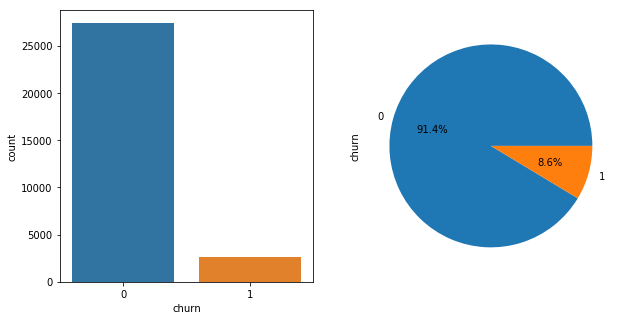

In [354]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.countplot(x="churn", data=telchurn1_gp)
plt.subplot(1,2,2)
ax = (telchurn1_gp["churn"].value_counts(normalize=True, sort=True)*100).plot.pie(autopct='%1.1f%%')
plt.show()

###### Churn cases are only 8.6% of the total customers. But since these are high value customers we need to identify the factors which lead to churn and recommend strategies to manage customer churn

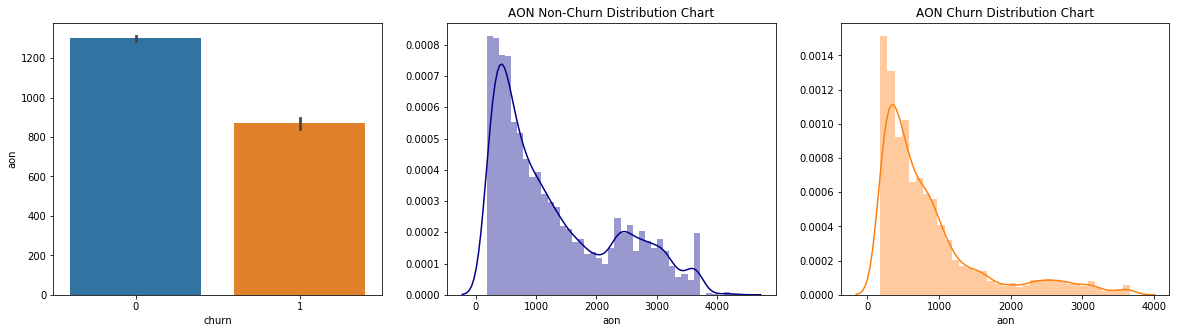

In [355]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.barplot(x='churn',y='aon',  data=telchurn1_gp)
plt.subplot(1,3,2)
sns.distplot(telchurn1_gp[telchurn1_gp['churn']==0]['aon'],color="darkblue")
plt.title('AON Non-Churn Distribution Chart')
plt.subplot(1,3,3)
sns.distplot(telchurn1_gp[telchurn1_gp['churn']==1]['aon'],color="tab:orange")
plt.title('AON Churn Distribution Chart')
plt.show()

In [356]:
# Identifying relationship of the churn with different features
def RelationWithChurn1(var1):
    #plt.figure(i)
    plt.title('Churn_'+ var1)
    x=telchurn1_gp[telchurn1_gp['churn']==0][var1].reset_index(drop=True)
    y=telchurn1_gp[telchurn1_gp['churn']==1][var1].reset_index(drop=True)
    df=pd.concat([x,y], axis=1)
    df.columns=['Non-churn','Churn']
    for col in df.columns:
        sns.kdeplot(df[col], shade=True)
        
def RelationWithChurn(var):
    print("Not Churned ",var)
    print(telchurn1_gp[telchurn1_gp['churn']==0][[var + '_6',var + '_7',var + '_8']].describe())
    print("\nChurned ",var)
    print(telchurn1_gp[telchurn1_gp['churn']==1][[var + '_6',var + '_7',var + '_8']].describe())
    plt.figure(figsize=(20, 15))
    
    plt.subplot(3,2,1)
    sns.boxplot(x="churn", y=var + '_6',hue='churn', data=telchurn1_gp)
    plt.yscale('symlog')
    plt.subplot(3,2,2)
    RelationWithChurn1(var + '_6')
    plt.subplot(3,2,3)
    sns.boxplot(x="churn", y=var + '_7',hue='churn', data=telchurn1_gp)
    plt.yscale('symlog')
    plt.title(var + ' Churn Distribution Chart')
    plt.subplot(3,2,4)
    RelationWithChurn1(var + '_7')
    plt.subplot(3,2,5)
    sns.boxplot(x="churn", y=var + '_8',hue='churn', data=telchurn1_gp)
    plt.yscale('symlog')   
    plt.subplot(3,2,6)
    RelationWithChurn1(var + '_8')   
    plt.show()

Not Churned  arpu
             arpu_6        arpu_7        arpu_8
count  27401.000000  27401.000000  27401.000000
mean     578.848876    592.949829    562.538432
std      430.026607    457.352095    492.931499
min    -2258.709000  -2014.045000   -945.808000
25%      362.388000    369.675000    319.328000
50%      489.551000    496.291000    471.024000
75%      691.248000    701.575000    691.220000
max    27731.088000  35145.834000  33543.624000

Churned  arpu
             arpu_6        arpu_7       arpu_8
count   2590.000000   2590.000000  2590.000000
mean     679.126140    550.778696   242.925640
std      551.928262    517.464589   379.085693
min     -209.465000   -158.963000   -37.887000
25%      396.514750    289.802750     0.000000
50%      574.551000    464.738000   100.959000
75%      819.566500    691.684000   350.921000
max    11505.508000  13224.119000  5228.826000


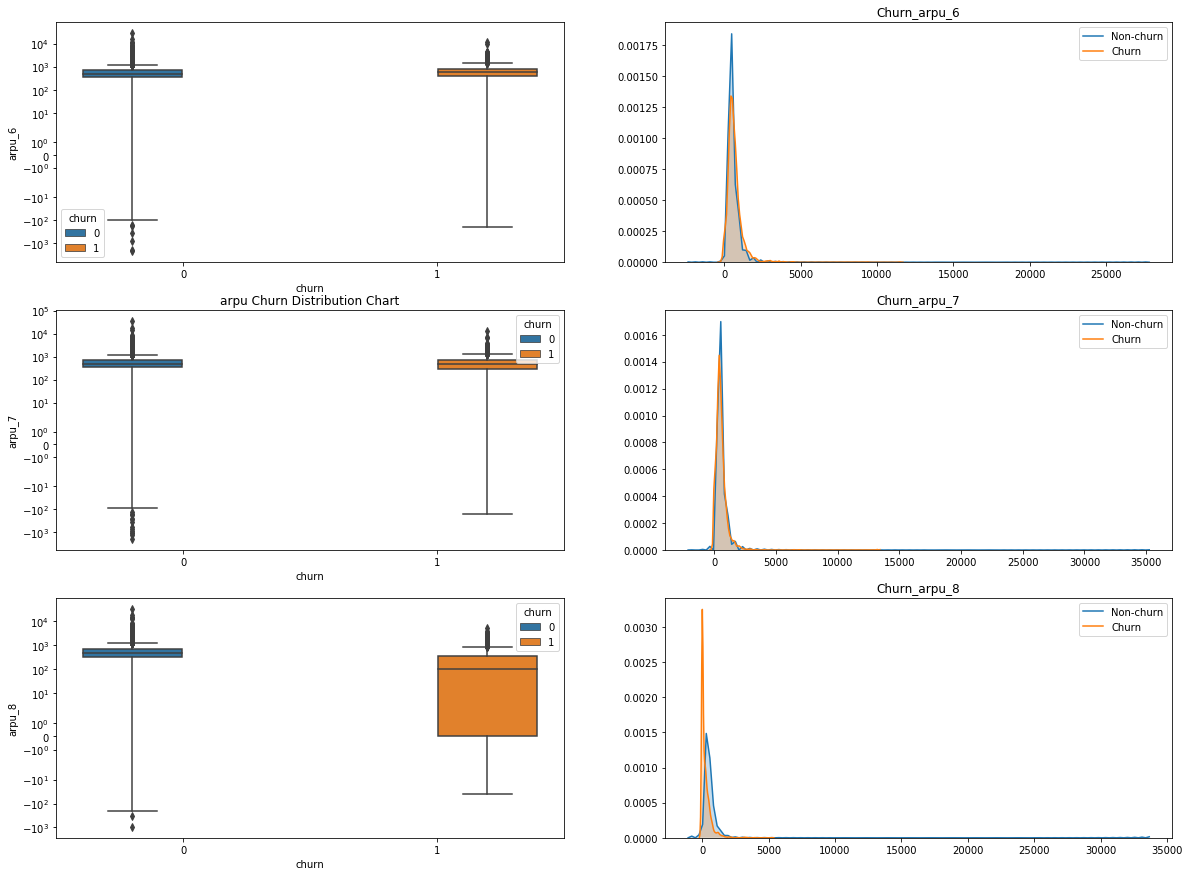

In [357]:
RelationWithChurn('arpu')

###### Average revenue per user remained consistent for churn and non churn for june and july, but decreases in aug for those who are about to churn. It can be an indicator for churn.

Not Churned  roam_og_mou
       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
count   27191.000000   27257.000000   27199.000000
mean       27.149034      19.338042      19.254604
std       108.248435      88.596864      97.230324
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         0.000000       0.000000       0.000000
max      3775.110000    1878.860000    3493.360000

Churned  roam_og_mou
       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
count    2484.000000    2431.000000    1852.000000
mean       57.011602      55.116035      64.929741
std       201.661398     170.669169     204.652300
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       6.690000
75%         5.747500      29.020000      46.985000
max      3161.790000    2812.040000    5337.040000


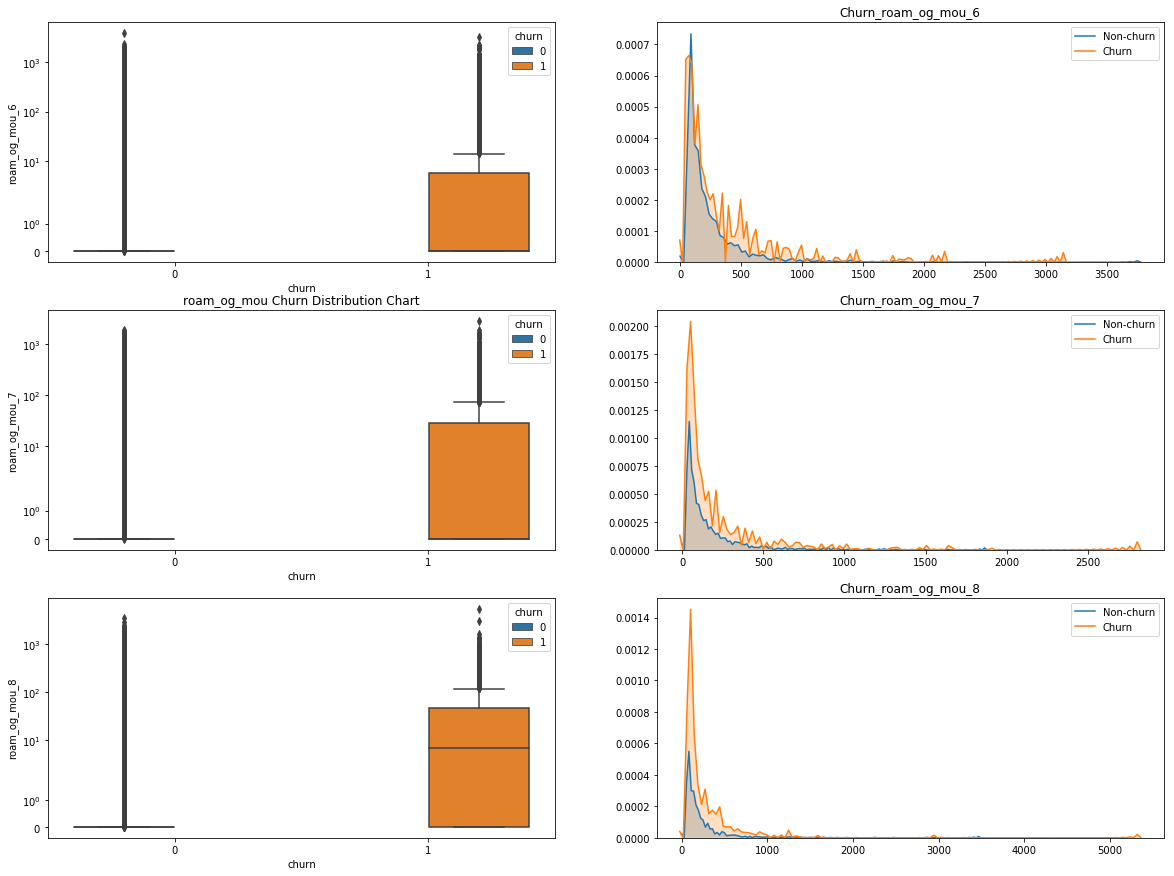

In [376]:
RelationWithChurn('roam_og_mou')

###### Roaming outgoing minutes of usage is high for churn.

Not Churned  roam_ic_mou
       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
count   27191.000000   27257.000000   27199.000000
mean       16.310047      11.989537      11.946073
std        71.007341      67.290607      68.240628
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         0.000000       0.000000       0.000000
max      2613.310000    2933.080000    4169.810000

Churned  roam_ic_mou
       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
count    2484.000000    2431.000000    1852.000000
mean       31.785028      32.497219      39.191118
std       142.288885     143.894729     144.524893
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       2.455000
75%         2.202500       8.095000      17.867500
max      2307.910000    3813.290000    2898.340000


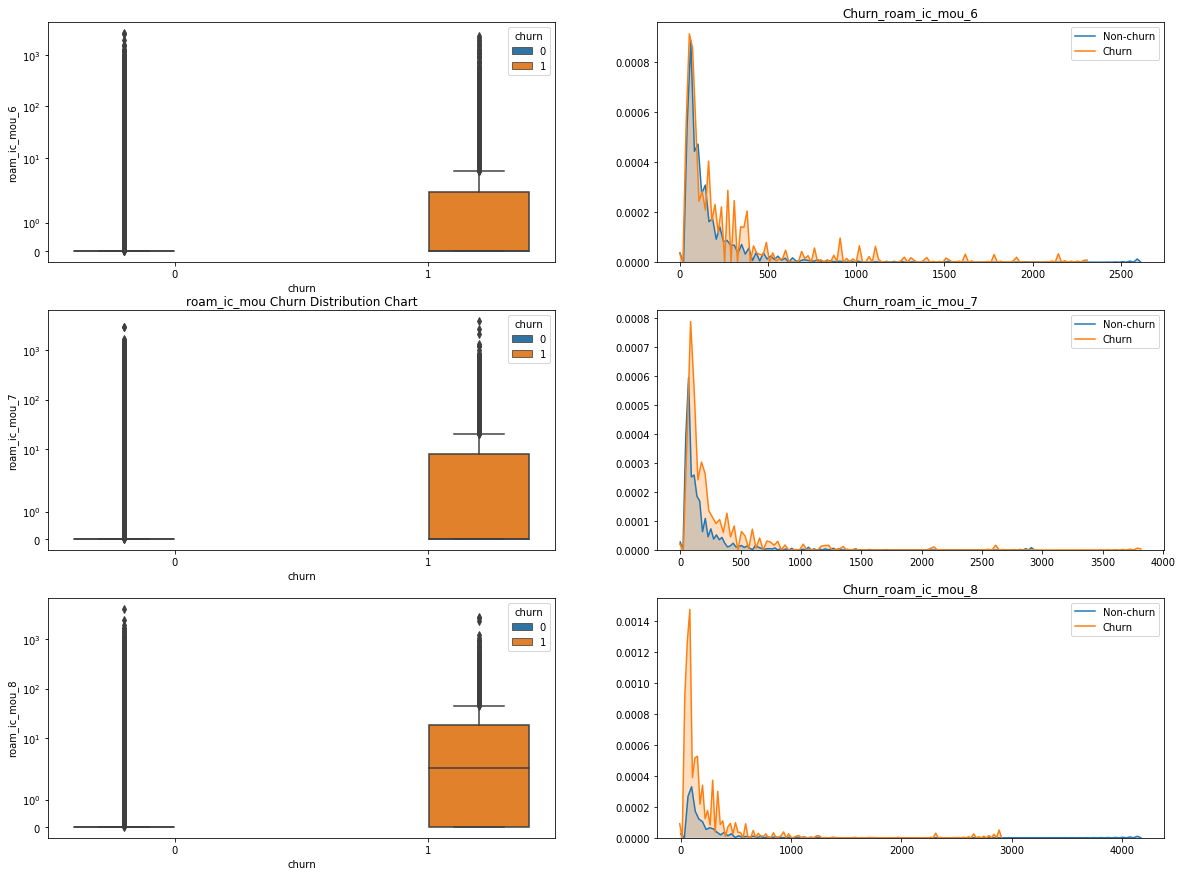

In [377]:
RelationWithChurn('roam_ic_mou')

###### Roaming incoming minutes of usage is high for churn.

Not Churned  vbc_3g
           vbc_3g_6      vbc_3g_7      vbc_3g_8
count  27401.000000  27401.000000  27401.000000
mean     125.430324    141.516948    138.838767
std      395.676642    417.527203    402.942926
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000     10.820000     18.380000
max    11166.210000   9165.600000  12916.220000

Churned  vbc_3g
          vbc_3g_6     vbc_3g_7     vbc_3g_8
count  2590.000000  2590.000000  2590.000000
mean     82.033598    71.419239    32.648432
std     321.438711   285.158197   198.109814
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    6931.810000  4908.270000  5738.740000


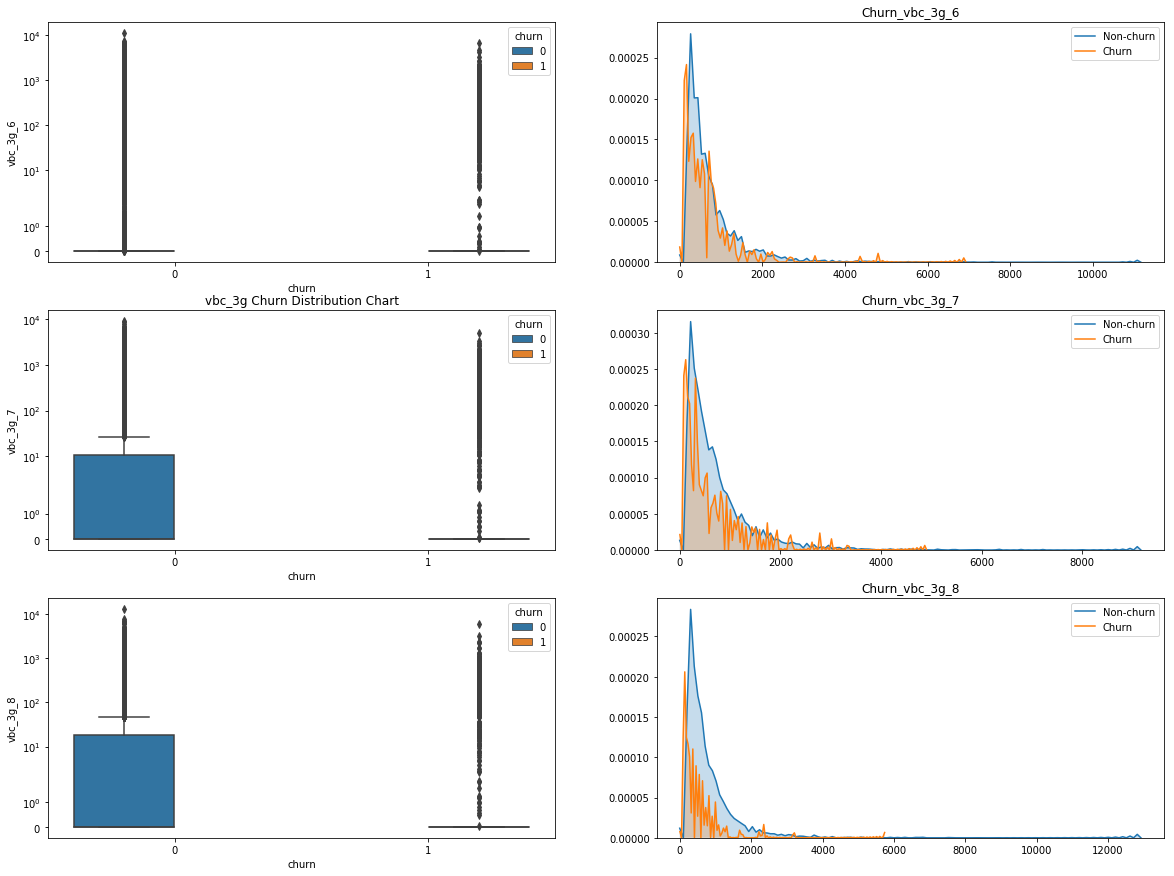

In [360]:
RelationWithChurn('vbc_3g')

###### Volumne based cost does not give a consistent picture of whether we can identify churn here or not.

Not Churned  max_rech_amt
       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
count    27401.000000    27401.000000    27401.000000
mean       171.850626      177.434181      170.316375
std        171.722653      177.362951      171.015944
min          0.000000        0.000000        0.000000
25%        110.000000      110.000000      100.000000
50%        120.000000      128.000000      130.000000
75%        200.000000      200.000000      198.000000
max       4010.000000     4010.000000     4449.000000

Churned  max_rech_amt
       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
count     2590.000000     2590.000000     2590.000000
mean       166.673359      156.667568       84.137838
std        203.965770      220.670416      170.379609
min          0.000000        0.000000        0.000000
25%        100.000000       50.000000        0.000000
50%        110.000000      110.000000       30.000000
75%        154.000000      150.000000      130.000000
max       2933.000000     2933.00

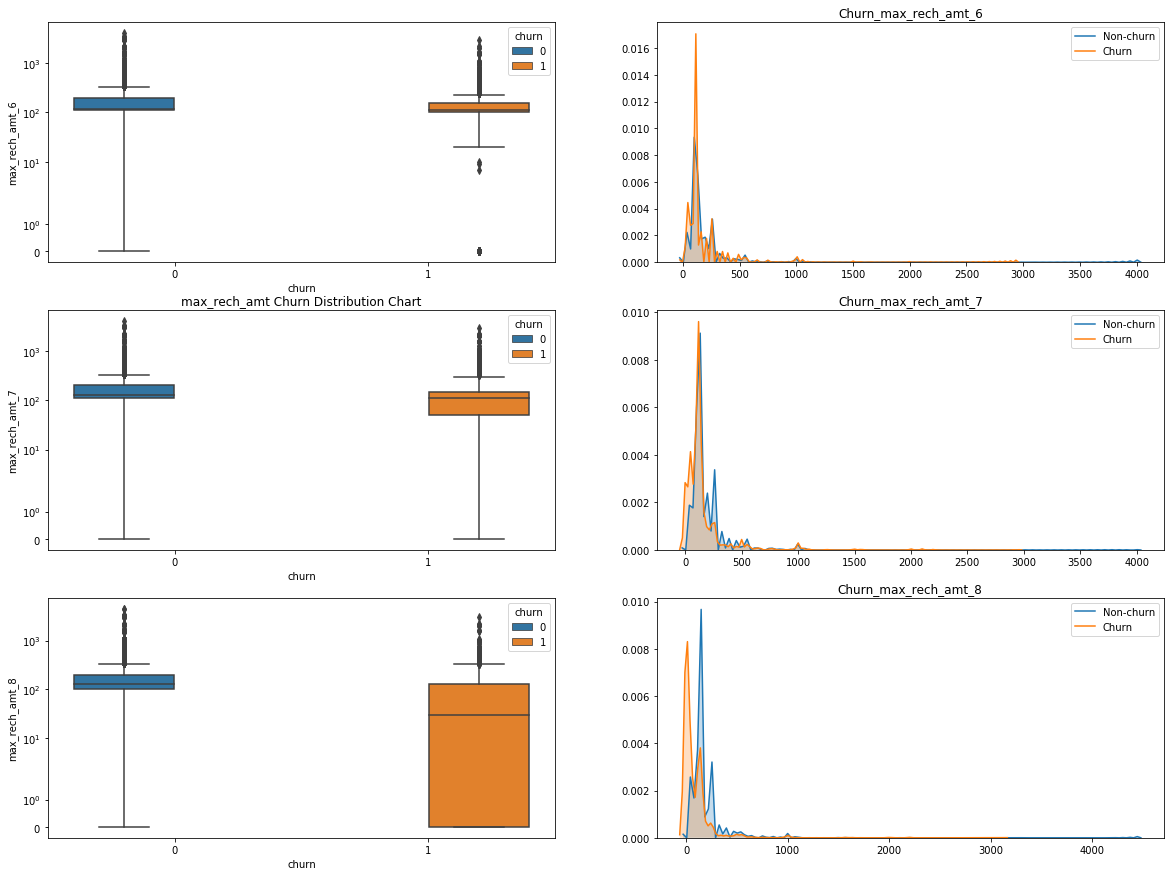

In [361]:
RelationWithChurn('max_rech_amt')

###### Maximum recharge amount remained consistent for churn and non churn for june. In july there is a slight decrease on for those who churn. But decreases drastically in aug for those who are about to churn. It can be an indicator for churn.

Not Churned  vol_2g_mb
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27401.000000  27401.000000  27401.000000
mean      81.051329     81.421408     74.739445
std      281.488437    287.149143    278.845513
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       17.190000     18.570000     14.420000
max    10285.900000   7873.550000  11117.610000

Churned  vol_2g_mb
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count  2590.000000  2590.000000  2590.000000
mean     60.951151    49.206108    15.300888
std     243.248764   219.638433   121.044062
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    4017.160000  3430.730000  3349.190000


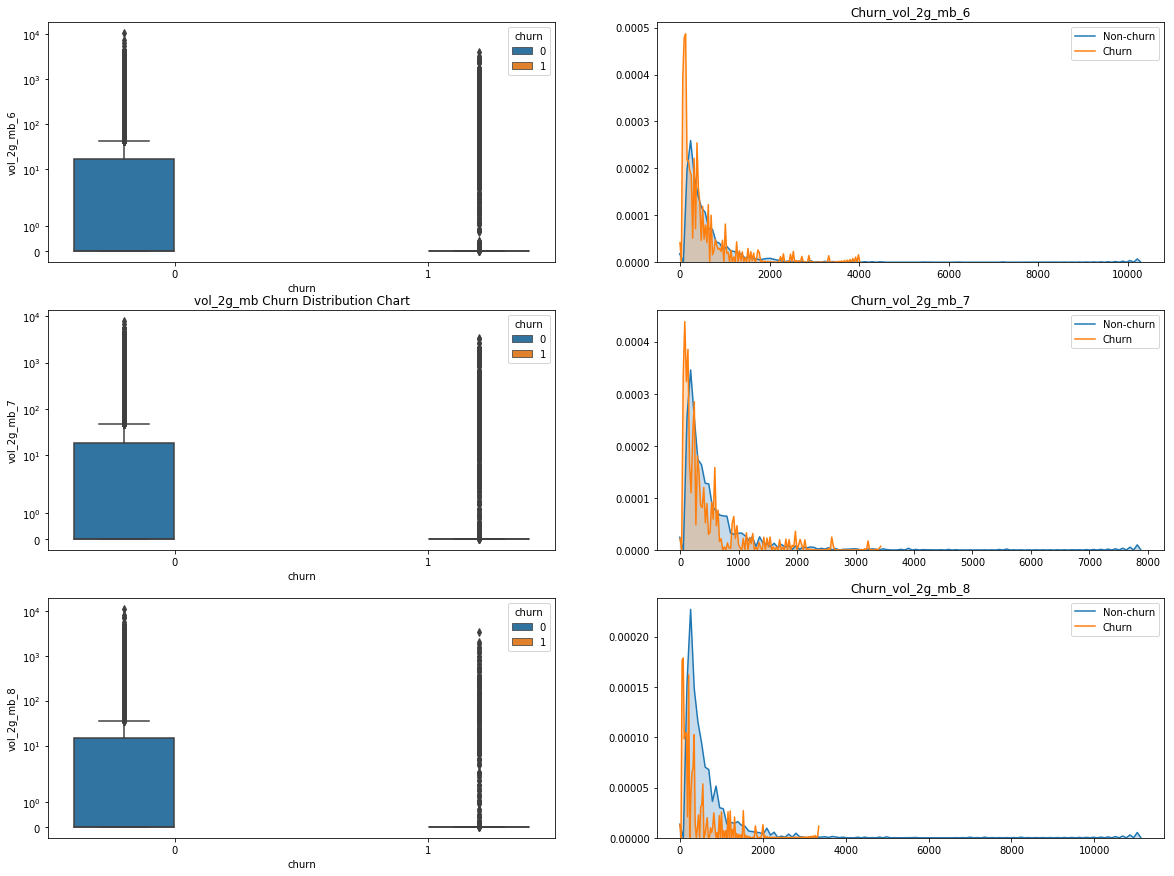

In [362]:
RelationWithChurn('vol_2g_mb')

###### 2g usage volumns shows customer who churned were not using 2g data services at any point in the durations.

Not Churned  vol_3g_mb
        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8
count  27401.000000  27401.000000  27401.000000
mean     266.064308    290.552659    290.739536
std      879.952713    869.596273    886.243080
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000     38.880000     31.360000
max    45735.400000  28144.120000  30036.060000

Churned  vol_3g_mb
       vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8
count  2590.000000   2590.000000   2590.000000
mean    189.006432    158.230305     56.842645
std     715.839687    691.181487    446.787219
min       0.000000      0.000000      0.000000
25%       0.000000      0.000000      0.000000
50%       0.000000      0.000000      0.000000
75%       0.000000      0.000000      0.000000
max    9400.120000  15115.510000  13440.720000


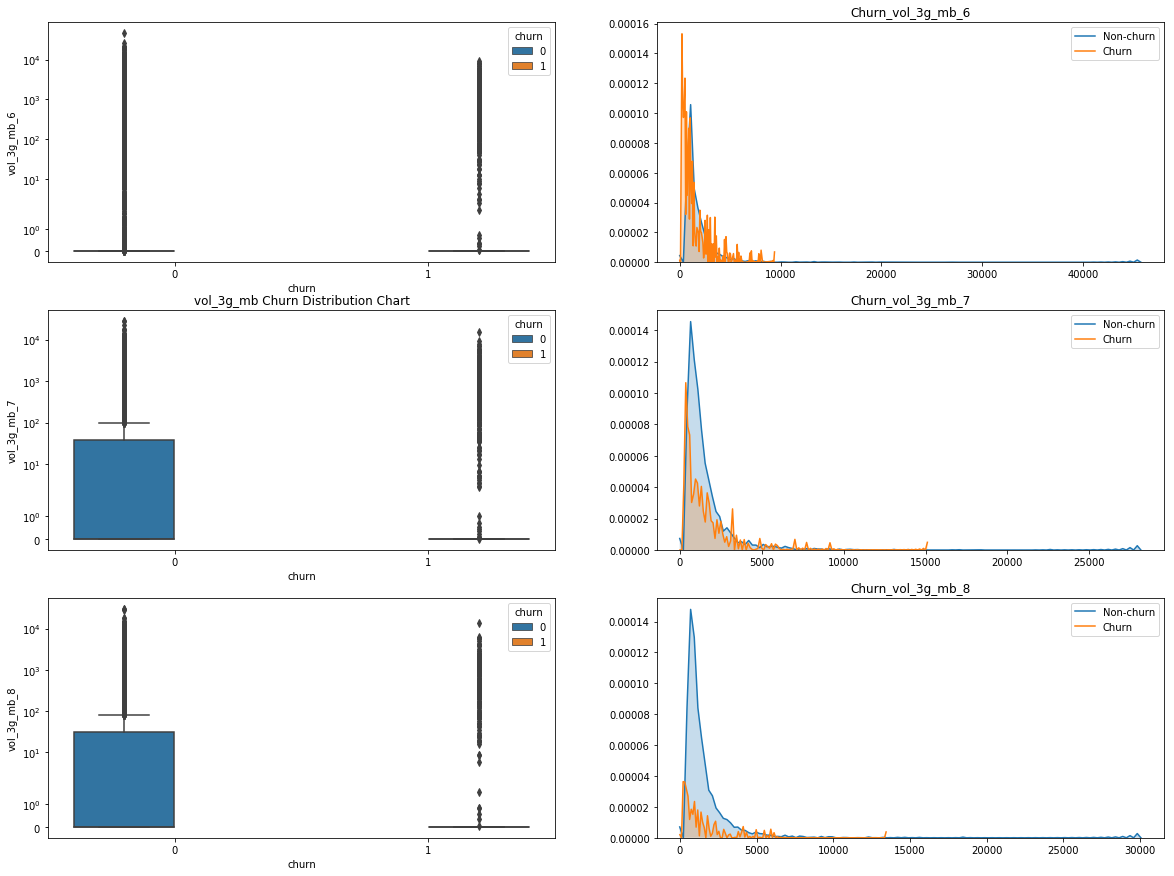

In [363]:
RelationWithChurn('vol_3g_mb')

###### 3g usage volumns shows customer who churned were not using 3g data services at any point in the durations

Not Churned  av_rech_amt_data
       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8
count        27401.000000        27401.000000        27401.000000
mean            93.431808          101.681145           96.623799
std            193.273100          200.680938          190.738719
min              0.000000            0.000000            0.000000
25%              0.000000            0.000000            0.000000
50%              0.000000            0.000000            0.000000
75%            154.000000          154.000000          154.000000
max           7546.000000         4365.000000         4061.000000

Churned  av_rech_amt_data
       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8
count         2590.000000         2590.000000         2590.000000
mean            65.882432           58.289992           20.345108
std            167.956784          169.408117          100.652933
min              0.000000            0.000000            0.000000
25%              0.

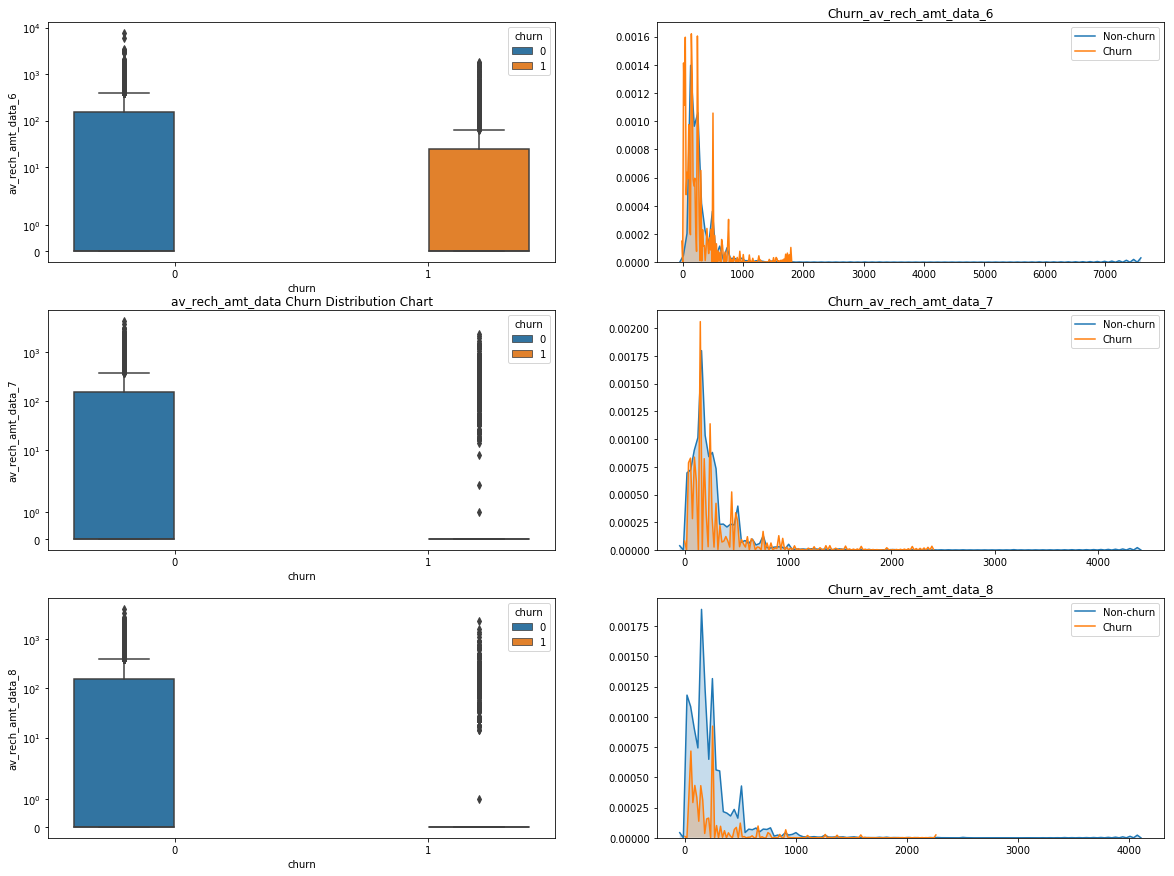

In [364]:
RelationWithChurn('av_rech_amt_data')

###### Customers who churned had very little spending for recharging data

Not Churned  total_ic_mou
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count    27401.000000    27401.000000    27401.000000
mean       313.610935      326.188546      316.646516
std        360.659905      372.086160      366.799978
min          0.000000        0.000000        0.000000
25%         94.390000      107.630000       98.090000
50%        211.880000      221.990000      212.110000
75%        401.480000      409.910000      402.010000
max       6798.640000     7279.080000     5990.710000

Churned  total_ic_mou
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count     2590.000000     2590.000000     2590.000000
mean       242.012181      193.450293       68.801668
std        361.031668      318.261896      154.523489
min          0.000000        0.000000        0.000000
25%         49.460000       27.852500        0.000000
50%        137.045000      100.075000        0.000000
75%        289.465000      235.770000       70.290000
max       6633.180000     5137.56

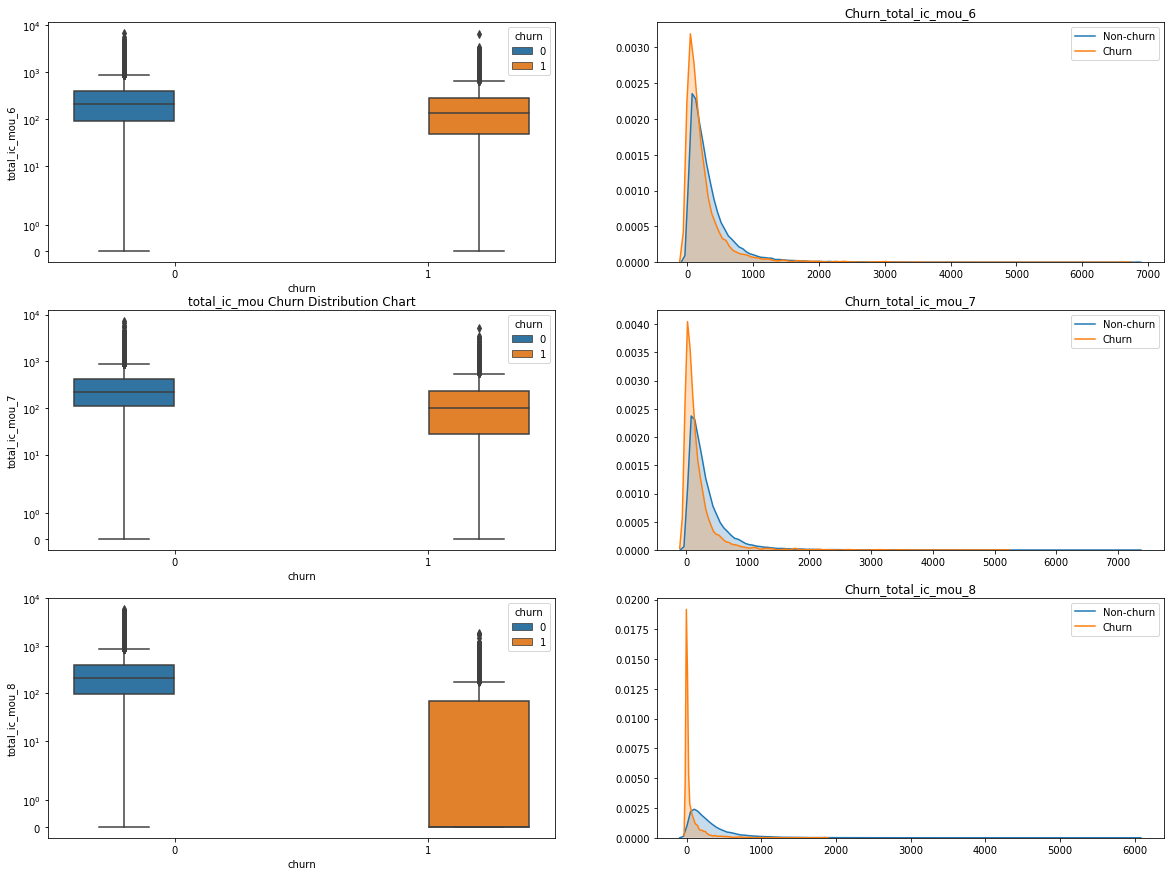

In [365]:
RelationWithChurn('total_ic_mou')

###### Total incoming minutes of usage decresed drastically for churners in august. This can be one of the indicators of churn.

Not Churned  roam_ic_mou
       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
count   27191.000000   27257.000000   27199.000000
mean       16.310047      11.989537      11.946073
std        71.007341      67.290607      68.240628
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         0.000000       0.000000       0.000000
max      2613.310000    2933.080000    4169.810000

Churned  roam_ic_mou
       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
count    2484.000000    2431.000000    1852.000000
mean       31.785028      32.497219      39.191118
std       142.288885     143.894729     144.524893
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       2.455000
75%         2.202500       8.095000      17.867500
max      2307.910000    3813.290000    2898.340000


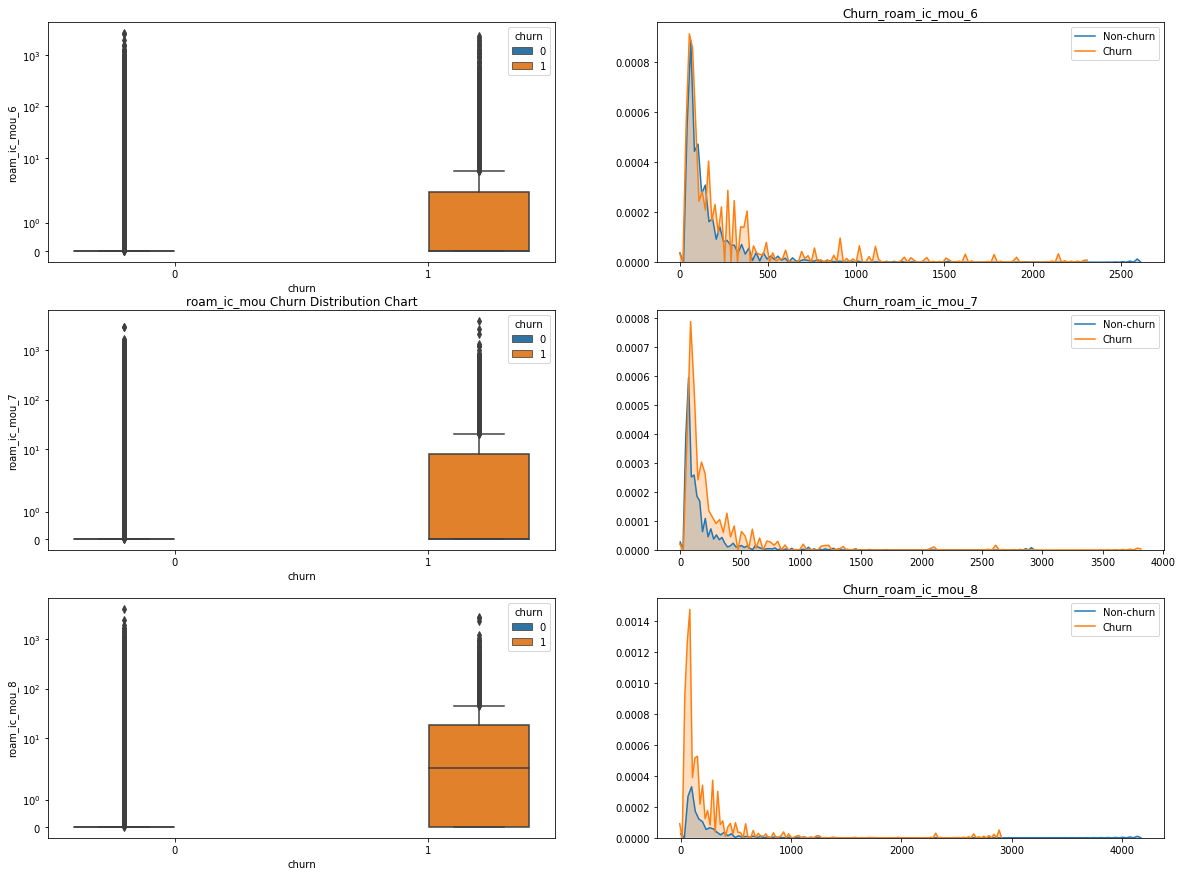

In [366]:
RelationWithChurn('roam_ic_mou')

###### Roaming incoming minutes of usage shows users who churned have more minutes which means they would have not been happt with the roaming charges and possibly network coverage while in roaming

Not Churned  roam_og_mou
       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
count   27191.000000   27257.000000   27199.000000
mean       27.149034      19.338042      19.254604
std       108.248435      88.596864      97.230324
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         0.000000       0.000000       0.000000
max      3775.110000    1878.860000    3493.360000

Churned  roam_og_mou
       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
count    2484.000000    2431.000000    1852.000000
mean       57.011602      55.116035      64.929741
std       201.661398     170.669169     204.652300
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       6.690000
75%         5.747500      29.020000      46.985000
max      3161.790000    2812.040000    5337.040000


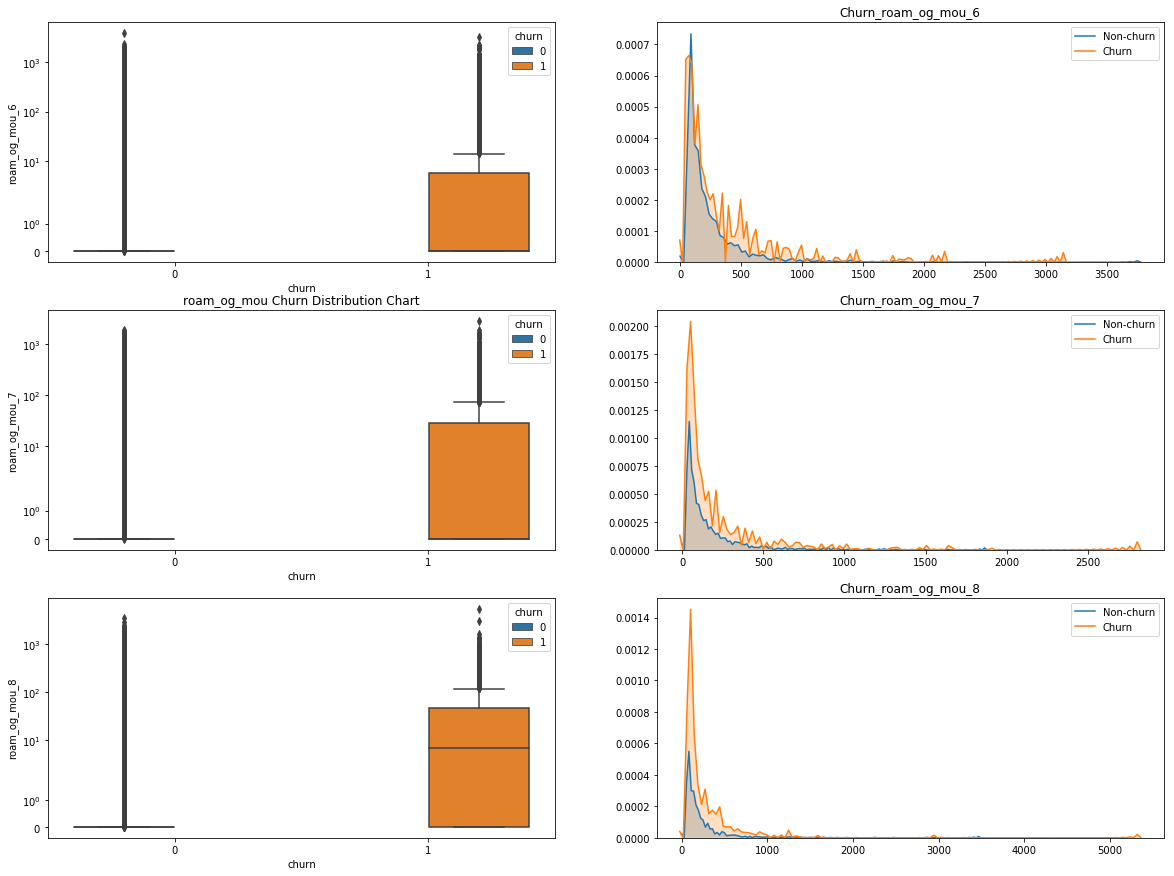

In [367]:
RelationWithChurn('roam_og_mou')

###### Roaming outgoing minutes of usage shows users who churned have more minutes which means they would have not been happt with the roaming charges and possibly network coverage while in roaming

Not Churned  loc_og_t2t_mou
       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8
count      27191.000000      27257.000000      27199.000000
mean          98.157710        100.865646         94.478649
std          239.989753        255.900572        244.435605
min            0.000000          0.000000          0.000000
25%            9.510000         10.660000          8.810000
50%           34.840000         36.490000         33.960000
75%           95.745000         97.010000         92.995000
max         6431.330000       7400.660000      10752.560000

Churned  loc_og_t2t_mou
       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8
count       2484.000000       2431.000000       1852.000000
mean          68.561192         50.017137         23.402748
std          212.935416        149.365037         81.127262
min            0.000000          0.000000          0.000000
25%            3.775000          1.860000          0.000000
50%           17.850000         13.330000      

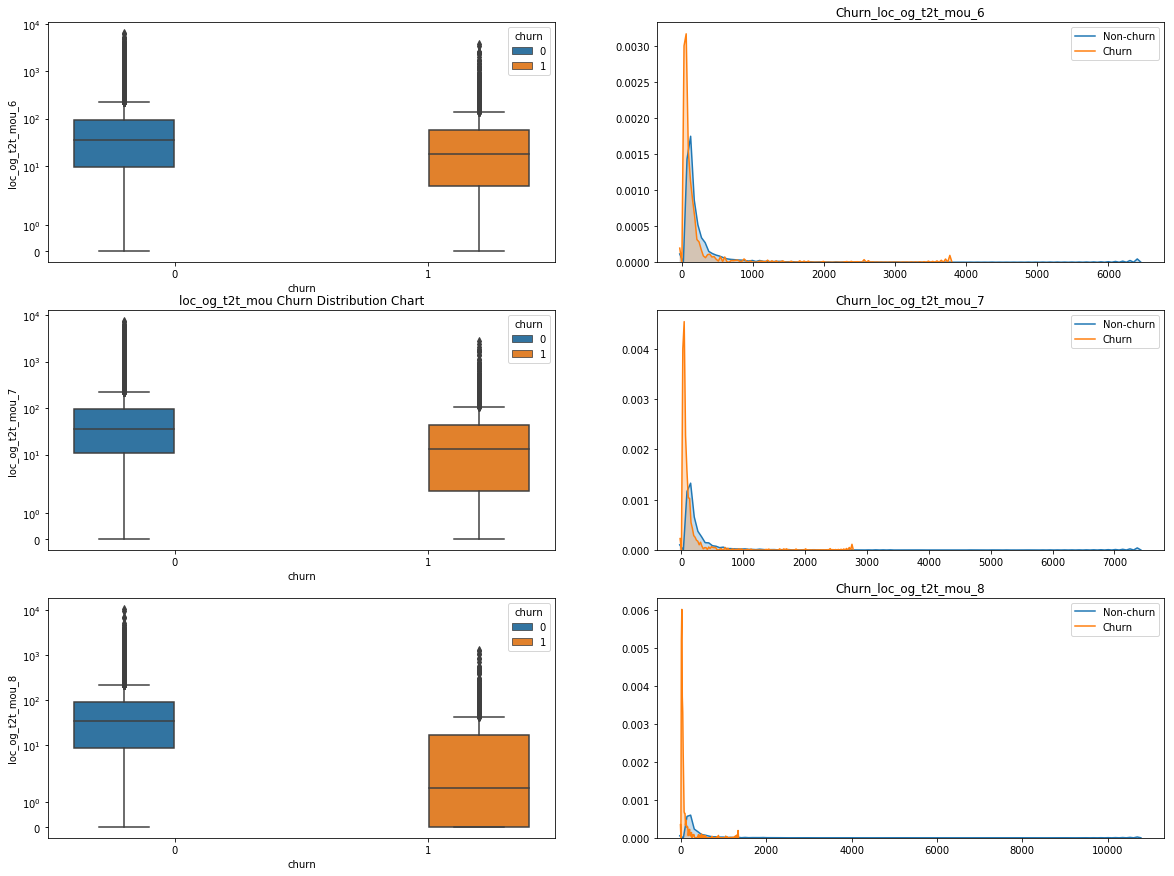

In [368]:
RelationWithChurn('loc_og_t2t_mou')

###### Local outgoing to same network decresed in august. Customers might not be have many contacts of the same network

Not Churned  loc_og_t2m_mou
       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8
count      27191.000000      27257.000000      27199.000000
mean         188.507890        190.491862        181.526525
std          252.974401        243.635780        240.175136
min            0.000000          0.000000          0.000000
25%           34.060000         39.180000         32.520000
50%          109.330000        113.890000        104.660000
75%          250.520000        251.990000        240.270000
max         4729.740000       4557.140000       4961.330000

Churned  loc_og_t2m_mou
       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8
count       2484.000000       2431.000000       1852.000000
mean         124.513583         99.843089         47.529708
std          217.602106        195.264030        123.038894
min            0.000000          0.000000          0.000000
25%           14.925000          9.390000          0.000000
50%           50.450000         39.680000      

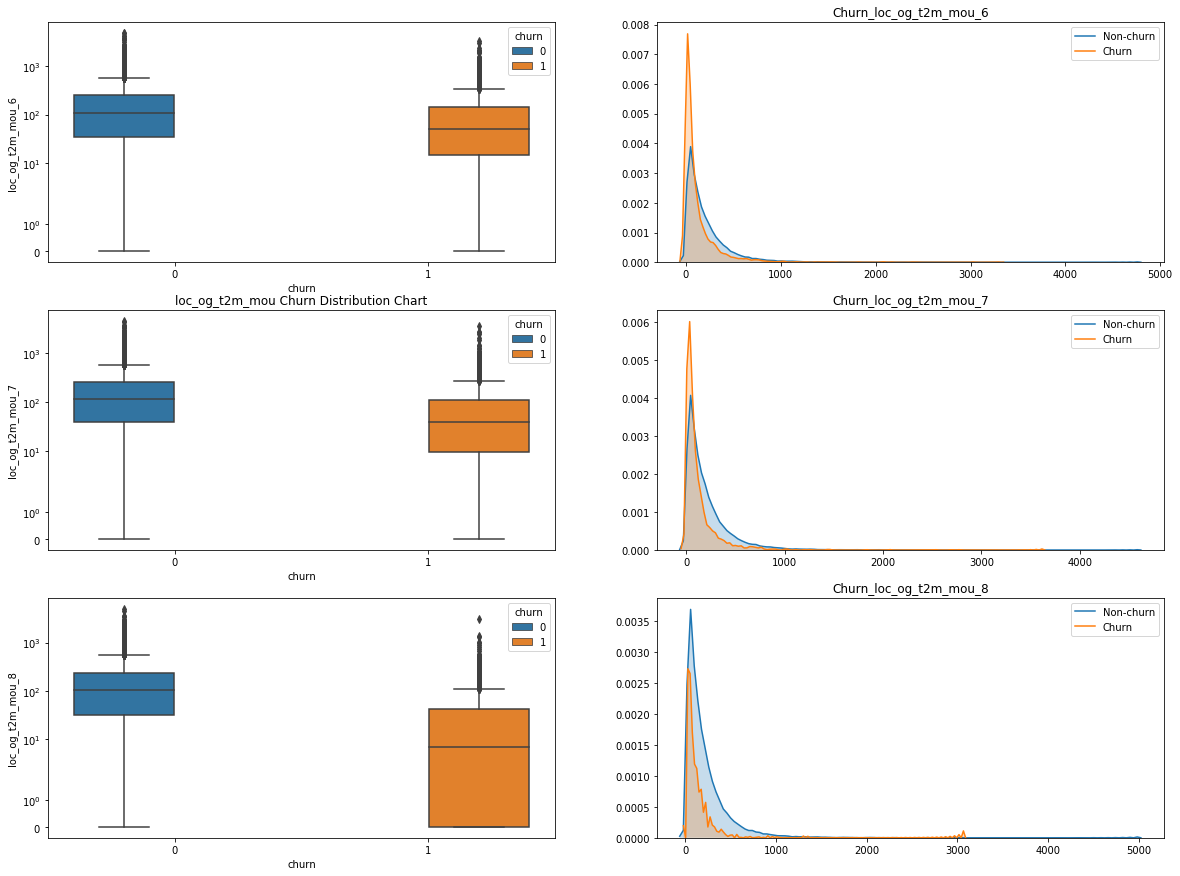

In [369]:
RelationWithChurn('loc_og_t2m_mou')

###### Local outgoing to other operator reduced in august.

Not Churned  loc_og_t2f_mou
       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8
count      27191.000000      27257.000000      27199.000000
mean           7.341358          7.511404          7.026677
std           21.795478         22.294354         21.032535
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.510000          0.610000          0.480000
75%            5.640000          5.890000          5.430000
max          676.480000       1057.960000        928.490000

Churned  loc_og_t2f_mou
       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8
count       2484.000000       2431.000000       1852.000000
mean           3.806232          3.316861          1.910524
std           31.389323         26.501960          8.947381
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.000000          0.000000      

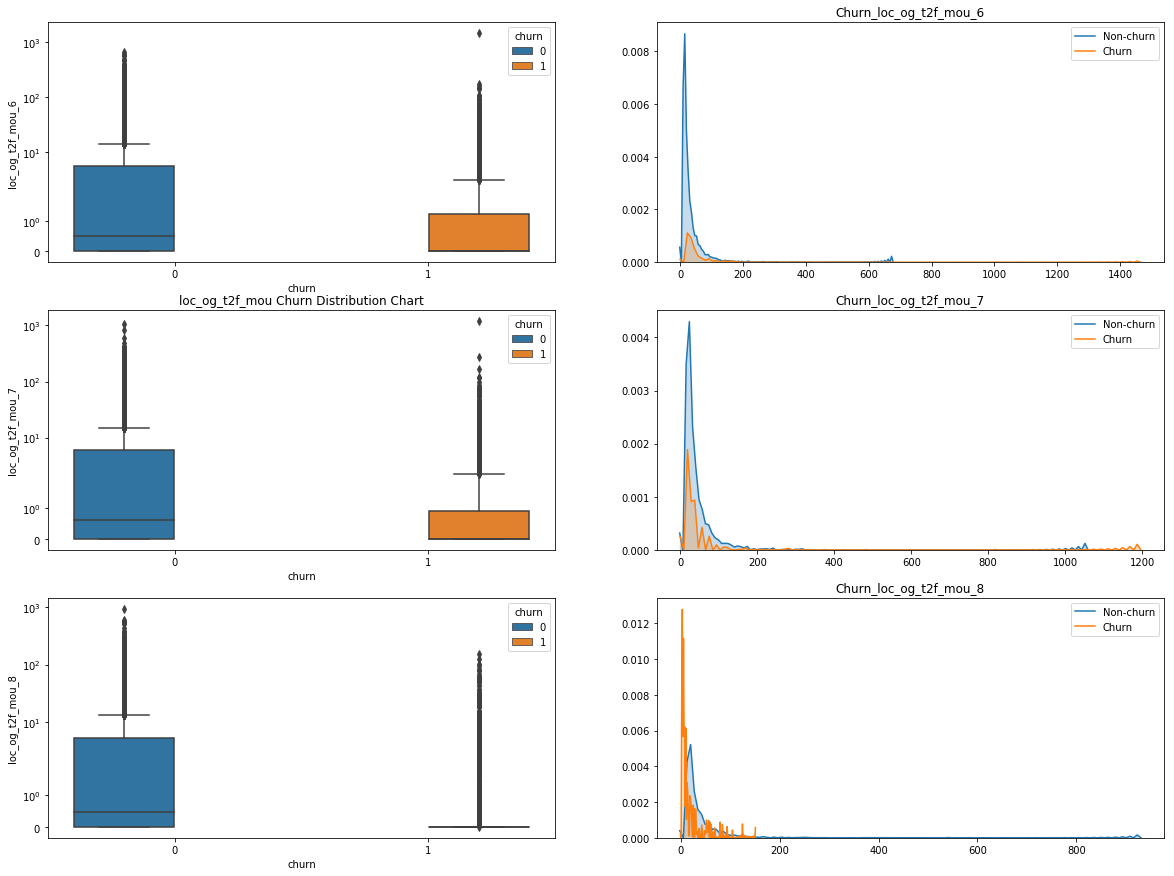

In [370]:
RelationWithChurn('loc_og_t2f_mou')

###### Local outgoing to fixed lined almost finished in august

Not Churned  total_og_mou
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count    27401.000000    27401.000000    27401.000000
mean       669.499595      711.936784      661.329434
std        636.828528      674.895839      691.377490
min          0.000000        0.000000        0.000000
25%        265.090000      283.880000      227.410000
50%        500.510000      529.940000      470.510000
75%        872.310000      931.230000      866.230000
max      10674.030000    11365.310000    14043.060000

Churned  total_og_mou
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count     2590.000000     2590.000000     2590.000000
mean       868.109502      677.690907      224.943799
std        853.128083      787.409673      471.926306
min          0.000000        0.000000        0.000000
25%        277.865000      108.847500        0.000000
50%        658.575000      466.200000        0.000000
75%       1209.370000      926.760000      255.300000
max       8488.360000     8285.64

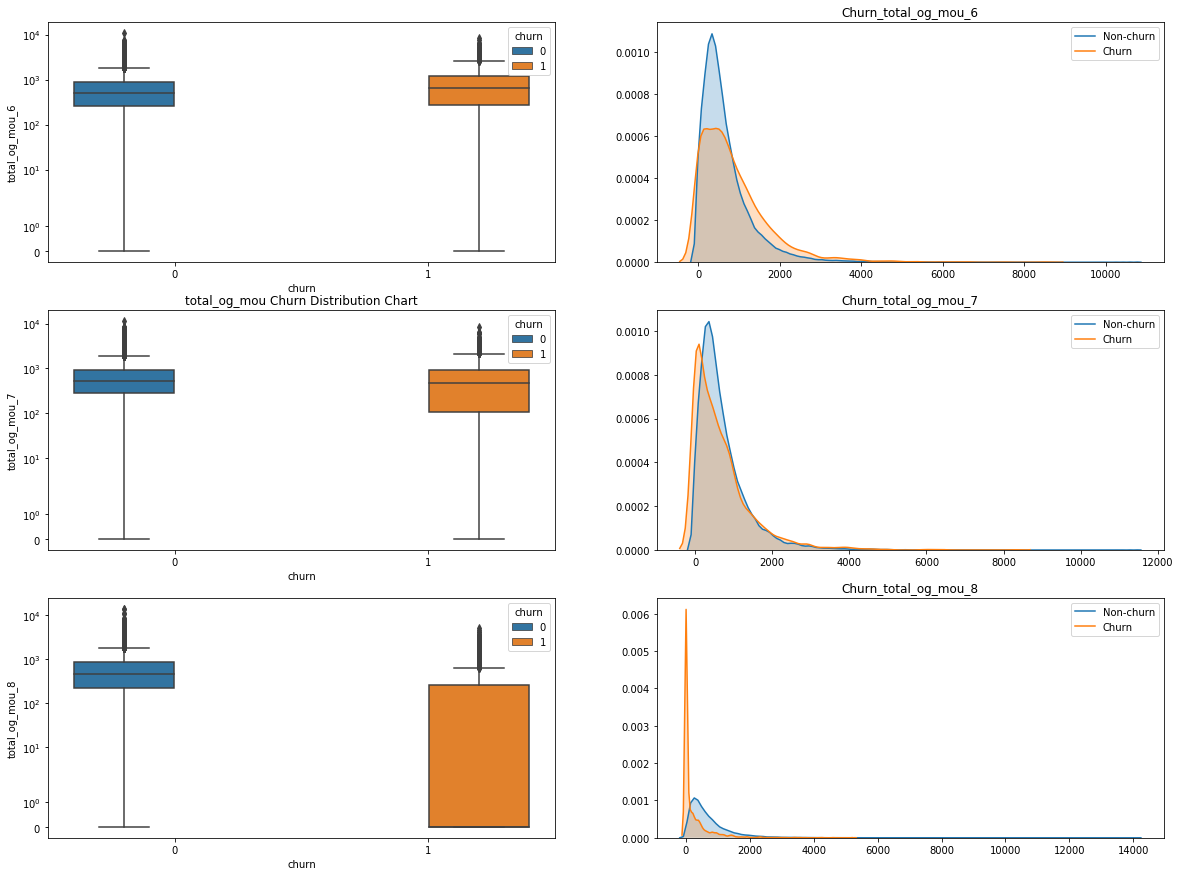

In [371]:
RelationWithChurn('total_og_mou')

###### Total outgoing minutes of usage significantly reduced in august

Not Churned  loc_ic_t2t_mou
       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8
count      27191.000000      27257.000000      27199.000000
mean          71.151628         73.598498         71.333505
std          161.024180        170.094330        161.799156
min            0.000000          0.000000          0.000000
25%            9.470000         11.030000          9.750000
50%           31.010000         32.660000         30.840000
75%           76.320000         78.380000         76.585000
max         6351.440000       5709.590000       4003.210000

Churned  loc_ic_t2t_mou
       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8
count       2484.000000       2431.000000       1852.000000
mean          50.958696         41.690469         19.881436
std          138.489185        139.204113         59.248595
min            0.000000          0.000000          0.000000
25%            3.775000          2.335000          0.000000
50%           17.225000         13.630000      

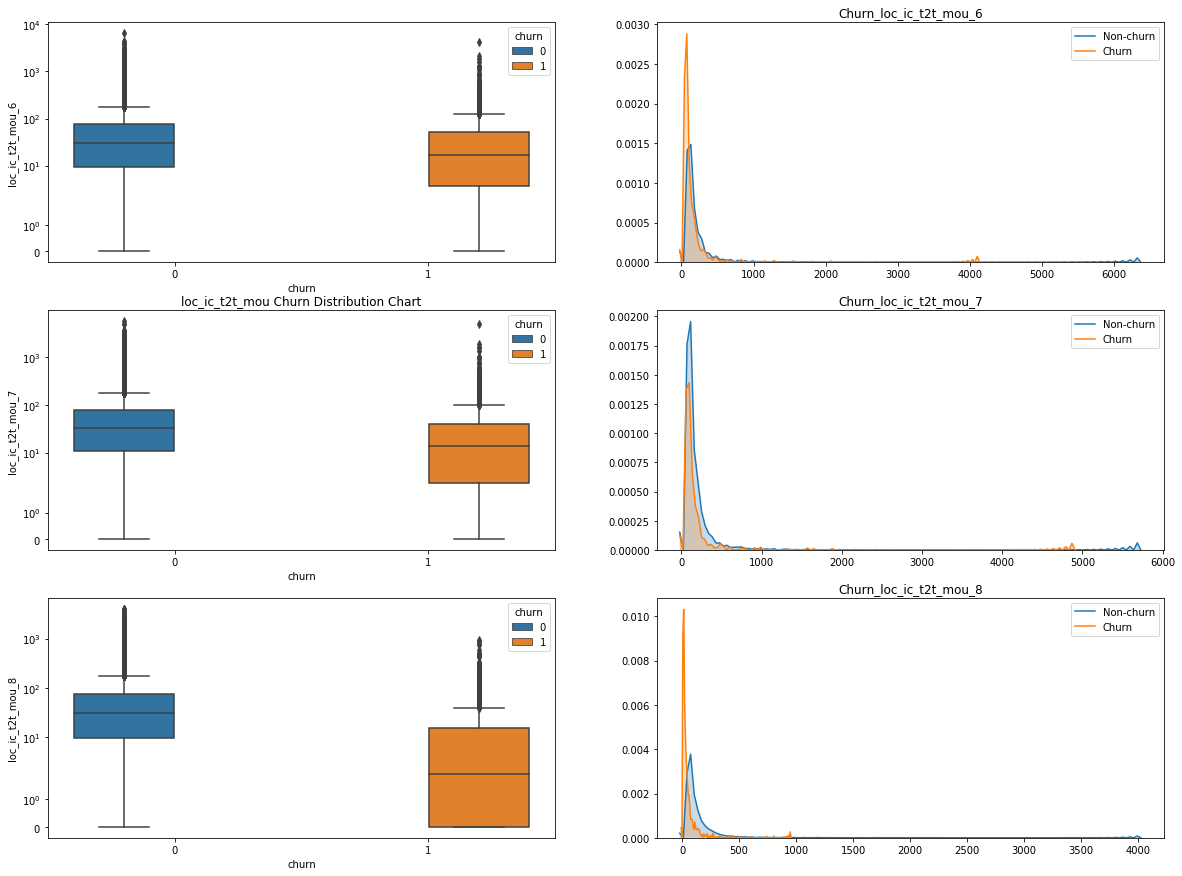

In [372]:
RelationWithChurn('loc_ic_t2t_mou')

###### Local incoming minutes of usage for same operator also seemedto reduce significantly in august

Not Churned  loc_ic_t2m_mou
       loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8
count      27191.000000      27257.000000      27199.000000
mean         165.263785        168.431728        166.274617
std          223.026778        222.194427        222.510376
min            0.000000          0.000000          0.000000
25%           37.400000         43.290000         40.540000
50%           99.660000        104.030000        101.980000
75%          210.600000        213.630000        211.220000
max         4693.860000       4388.730000       5738.460000

Churned  loc_ic_t2m_mou
       loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8
count       2484.000000       2431.000000       1852.000000
mean         117.608281         94.580642         44.354633
std          213.416044        179.717572         96.308781
min            0.000000          0.000000          0.000000
25%           17.205000         11.355000          0.000000
50%           54.820000         43.040000      

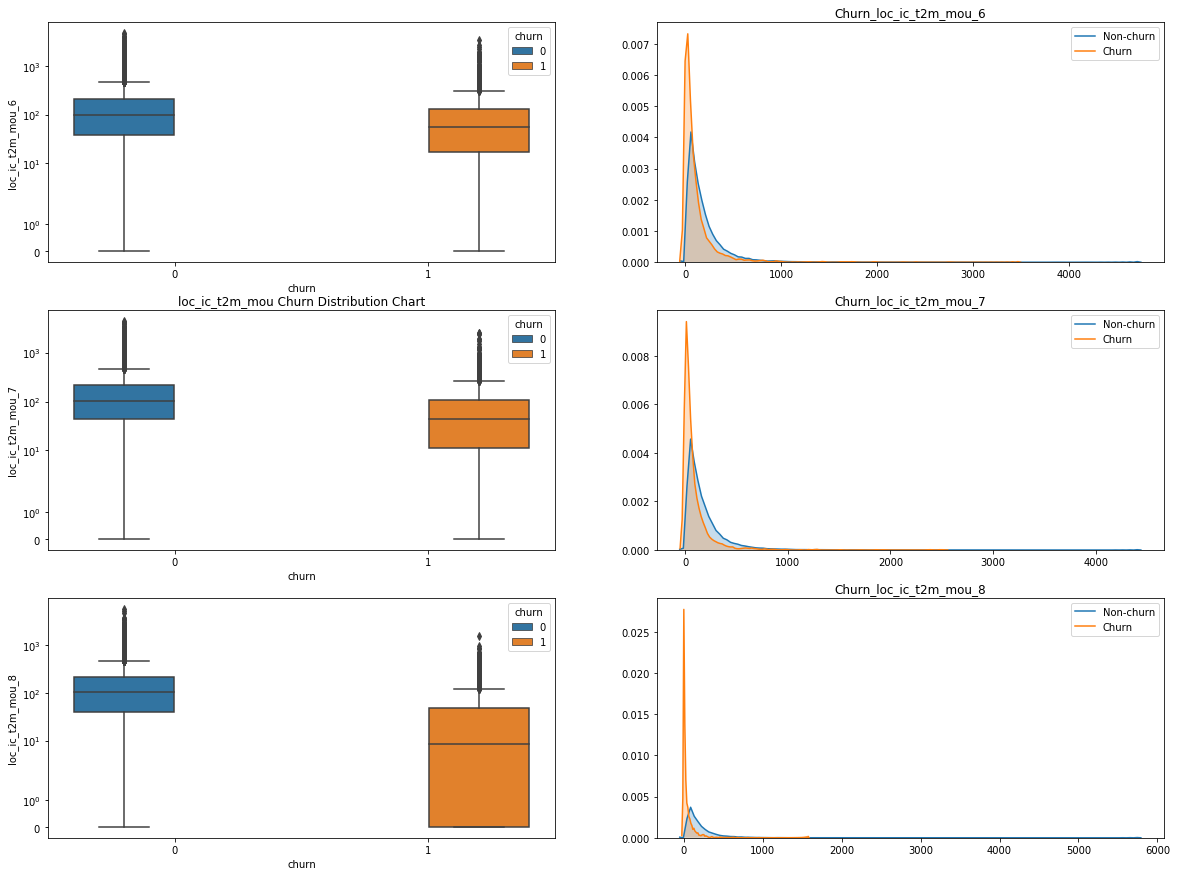

In [373]:
RelationWithChurn('loc_ic_t2m_mou')

###### local incoming minutes of usage for different operators greatly gets reduced in august

Not Churned  loc_ic_t2f_mou
       loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8
count      27191.000000      27257.000000      27199.000000
mean          16.428430         17.462376         15.948695
std           47.045208         50.669251         45.406946
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            2.350000          2.700000          2.540000
75%           13.590000         14.310000         13.160000
max         1678.410000       1983.010000       1588.530000

Churned  loc_ic_t2f_mou
       loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8
count       2484.000000       2431.000000       1852.000000
mean           8.333341          7.862065          3.848607
std           32.006639         36.198740         20.517827
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.130000          0.000000      

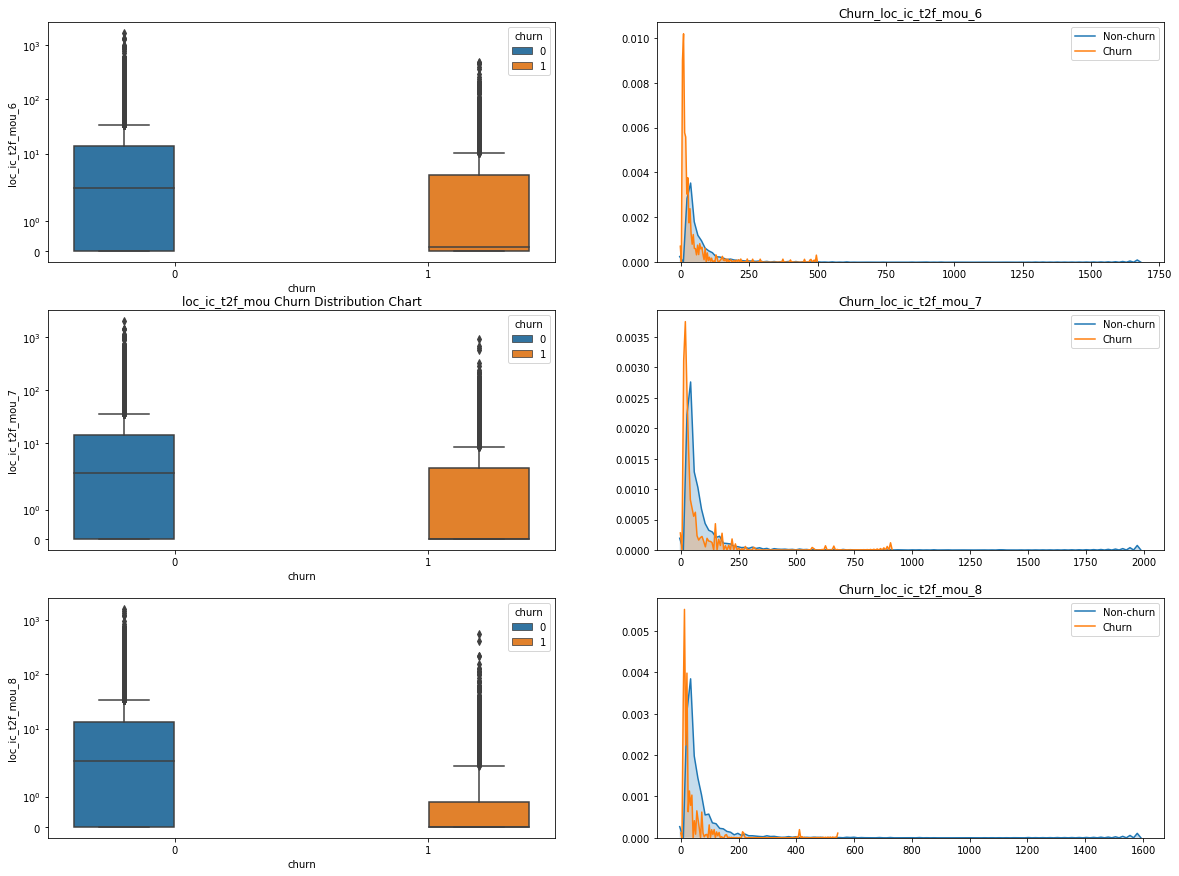

In [374]:
RelationWithChurn('loc_ic_t2f_mou')

###### local incoming minutes of usage for fixed line calling gets reduced in august

Not Churned  max_rech_data
       max_rech_data_6  max_rech_data_7  max_rech_data_8
count     27401.000000     27401.000000     27401.000000
mean         58.417175        60.882814        59.231743
std         105.385510       107.687957       106.733763
min           0.000000         0.000000         0.000000
25%           0.000000         0.000000         0.000000
50%           0.000000         0.000000         0.000000
75%          98.000000       145.000000        98.000000
max        1555.000000      1555.000000      1555.000000

Churned  max_rech_data
       max_rech_data_6  max_rech_data_7  max_rech_data_8
count      2590.000000      2590.000000      2590.000000
mean         42.113127        36.613514        14.392664
std         109.383507       110.700721        69.842751
min           0.000000         0.000000         0.000000
25%           0.000000         0.000000         0.000000
50%           0.000000         0.000000         0.000000
75%          23.000000         0.0000

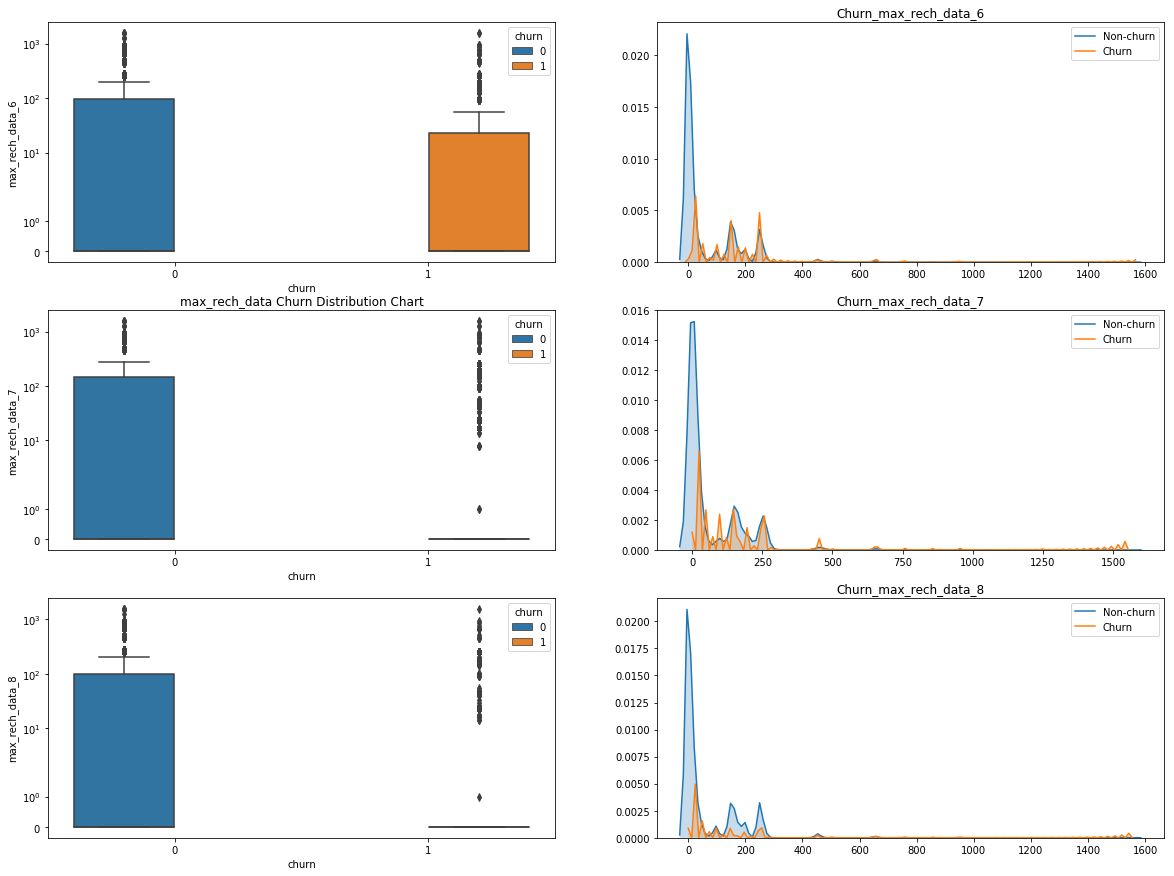

In [375]:
RelationWithChurn('max_rech_data')

###### Maximum recharge for data says interest of customers churning was almost nothing in july and august

Not Churned avg_rech_amt_gp
       avg_rech_amt_gp
count     27401.000000
mean        347.691316
std         244.534604
min         185.000000
25%         225.250000
50%         284.500000
75%         397.250000
max       18881.250000

Churned avg_rech_amt_gp
       avg_rech_amt_gp
count      2590.000000
mean        362.174421
std         243.739600
min         185.000000
25%         226.750000
50%         291.750000
75%         411.687500
max        4254.250000


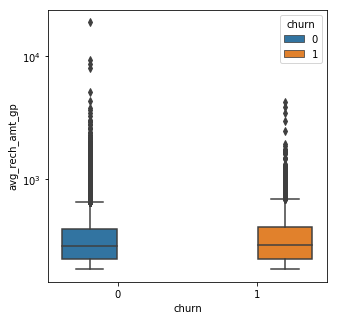

In [187]:
print("Not Churned avg_rech_amt_gp")
print(telchurn1_gp[telchurn1_gp['churn']==0][['avg_rech_amt_gp']].describe())
print("\nChurned avg_rech_amt_gp")
print(telchurn1_gp[telchurn1_gp['churn']==1][['avg_rech_amt_gp']].describe())
plt.figure(figsize=(5, 5))
sns.boxplot(x="churn", y='avg_rech_amt_gp',hue='churn', data=telchurn1_gp)
plt.yscale('symlog')
plt.show()

###### Nothing specific can be deduced as of now from avg_rech_amt_gp for churn and non-churn

#### Standardizing the data

In [188]:
#telchurn1_gp.isnull().mean()*100
telchurn1_gp.loc[:, telchurn1_gp.isnull().mean()*100 > 40].isnull().mean()*100
null_cols = telchurn1_gp.loc[:, telchurn1_gp.isnull().mean()*100 > 40].columns
print(null_cols)

#With such high percentage of null values above fields don't seem  of any use in predicting churn. Hence removing them
telchurn1_gp.drop(null_cols,axis=1,inplace=True)

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'],
      dtype='object')


In [189]:
telchurn1_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 7 to 99997
Columns: 134 entries, arpu_6 to day_of_last_rech_8
dtypes: float64(110), int64(24)
memory usage: 32.1 MB


In [190]:
telchurn1_gp.loc[:, telchurn1_gp.isnull().mean()*100 > 0].isnull().mean()*100

onnet_mou_6           1.053649
onnet_mou_7           1.010303
onnet_mou_8           3.134274
offnet_mou_6          1.053649
offnet_mou_7          1.010303
offnet_mou_8          3.134274
roam_ic_mou_6         1.053649
roam_ic_mou_7         1.010303
roam_ic_mou_8         3.134274
roam_og_mou_6         1.053649
roam_og_mou_7         1.010303
roam_og_mou_8         3.134274
loc_og_t2t_mou_6      1.053649
loc_og_t2t_mou_7      1.010303
loc_og_t2t_mou_8      3.134274
loc_og_t2m_mou_6      1.053649
loc_og_t2m_mou_7      1.010303
loc_og_t2m_mou_8      3.134274
loc_og_t2f_mou_6      1.053649
loc_og_t2f_mou_7      1.010303
loc_og_t2f_mou_8      3.134274
loc_og_t2c_mou_6      1.053649
loc_og_t2c_mou_7      1.010303
loc_og_t2c_mou_8      3.134274
loc_og_mou_6          1.053649
loc_og_mou_7          1.010303
loc_og_mou_8          3.134274
std_og_t2t_mou_6      1.053649
std_og_t2t_mou_7      1.010303
std_og_t2t_mou_8      3.134274
                        ...   
loc_ic_t2f_mou_6      1.053649
loc_ic_t

In [191]:
null_cols = telchurn1_gp.loc[:, telchurn1_gp.isnull().mean()*100 > 0].columns
print(null_cols)

# Since minutes of usage cannot be undefined or negative and we can assume where minutes is null it should be zero hence going ahead with that
telchurn1_gp[null_cols] = telchurn1_gp[null_cols].fillna(0, axis=1)
telchurn1_gp[null_cols].head()

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
7         57.84        54.68        52.29        453.43        567.16   
8        413.69       351.03        35.08         94.66         80.63   
13       501.76       108.39       534.24        413.31        119.28   
16        50.51        74.01        70.61        296.29        229.74   
17      1185.91         9.28         7.79         61.64          0.00   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
7         325.91          16.23          33.49          31.64          23.74   
8         136.48           0.00           0.00           0.00           0.00   
13        482.46          23.53         144.24          72.11           7.98   
16        162.76           0.00           2.83           0.00           0.00   
17          5.54           0.00           4.76           4.81           0.00   

    ...  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  \
7   ...           0.0          2.06         14.53         31.59        15.74   
8   ...           0.0          0.00          0.00          0.00         0.00   
13  ...           0.0        245.28         62.11        393.39        83.48   
16  ...           0.0          0.00          0.00          0.23         0.00   
17  ...           0.0          0.00          0.00          0.00         0.00   

    ic_others_7  ic_others_8  day_of_last_rech_6  day_of_last_rech_7  \
7         15.19        15.14                27.0                25.0   
8          0.00         0.00                25.0                31.0   
13        16.24        21.44                20.0                22.0   
16         0.00         0.00                30.0                31.0   
17         0.00         0.00                30.0                30.0   

    day_of_last_rech_8  
7                 26.0  
8                 30.0  
13                30.0  
16                14.0  
17                25.0  

[5 rows x 84 columns]

In [192]:
telchurn1_gp.loc[:, telchurn1_gp.isnull().mean()*100 > 0].columns

Index([], dtype='object')

In [193]:
telchurn1_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 7 to 99997
Columns: 134 entries, arpu_6 to day_of_last_rech_8
dtypes: float64(110), int64(24)
memory usage: 32.1 MB


### Model Building

In [194]:
churn_x = telchurn1_gp.drop(['churn'],axis=1)
churn_y = telchurn1_gp['churn']

In [195]:
# import standard scalar
from sklearn.preprocessing import StandardScaler

# extract columns
cols = churn_x.columns

# apply standard scalar
scaler = StandardScaler()

# produce scaled features
churn_x_scaled = scaler.fit_transform(churn_x)

# convert to data frame
churn_x_scaled = pd.DataFrame(churn_x_scaled, columns=cols)
churn_x_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  1.087881  1.642690  5.354503    -0.516751    -0.517957    -0.461233   
1 -0.471559 -0.209693 -0.807427     0.255316     0.097042    -0.498113   
2 -0.213801 -0.828615  0.118447     0.446397    -0.406496     0.571563   
3 -0.353540 -0.625157 -0.704803    -0.532655    -0.477842    -0.421974   
4  0.231500 -1.231848 -1.034607     1.930759    -0.612173    -0.556594   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  sachet_3g_7  \
0      0.075424      0.294412     -0.102711      -0.015029  ...     -0.15559   
1     -0.686669     -0.705211     -0.499281      -0.220016  ...     -0.15559   
2     -0.009798     -0.625801      0.225026       0.077172  ...     -0.15559   
3     -0.258370     -0.398850     -0.444264      -0.220016  ...     -0.15559   
4     -0.756810     -0.870873     -0.773403      -0.220016  ...     -0.15559   

   sachet_3g_8       aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  avg_rech_amt_gp  \
0    -0.144457 -0.473125 -0.184121 -0.284337 -0.263953         0.996181   
1    -0.144457 -0.972557 -0.278090  1.898761  0.001224        -0.363783   
2    -0.144457  1.377952 -0.331922 -0.331807 -0.312004        -0.650092   
3    -0.144457 -0.771554 -0.331922 -0.325806 -0.255876        -0.488532   
4    -0.144457 -0.611572 -0.331922 -0.331807 -0.312004        -0.592830   

   day_of_last_rech_6  day_of_last_rech_7  day_of_last_rech_8  
0            0.052766           -0.514736           -0.060151  
1           -0.400347            0.768243            0.576740  
2           -1.533128           -1.156225            0.576740  
3            0.732434            0.768243           -1.970824  
4            0.732434            0.554413           -0.219374  

[5 rows x 133 columns]

In [196]:
churn_x_scaled.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  2.999100e+04  2.999100e+04  2.999100e+04  2.999100e+04  2.999100e+04   
mean  -9.549673e-17 -7.387050e-17 -2.104448e-16  1.156829e-17  6.172841e-17   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -6.428339e+00 -5.622965e+00 -3.007215e+00 -6.422435e-01 -6.314312e-01   
25%   -5.042082e-01 -4.840633e-01 -4.979259e-01 -5.533207e-01 -5.467820e-01   
50%   -2.069259e-01 -2.065807e-01 -1.681750e-01 -3.693457e-01 -3.712371e-01   
75%    2.633289e-01  2.409848e-01  2.769452e-01  1.243133e-01  1.152624e-01   
max    6.130526e+01  7.463841e+01  6.703668e+01  1.536259e+01  1.629795e+01   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  2.999100e+04  2.999100e+04  2.999100e+04  2.999100e+04   2.999100e+04   
mean   2.232070e-16  1.705814e-17 -1.650657e-17 -1.282544e-16  -5.834955e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   1.000017e+00   
min   -5.732876e-01 -8.877447e-01 -8.708730e-01 -7.850007e-01  -2.200165e-01   
25%   -5.156636e-01 -5.963066e-01 -5.925060e-01 -5.856478e-01  -2.200165e-01   
50%   -3.602996e-01 -2.885549e-01 -2.916001e-01 -2.806993e-01  -2.200165e-01   
75%    6.461573e-02  2.241806e-01  2.238160e-01  2.256014e-01  -2.200165e-01   
max    2.246894e+01  1.687545e+01  1.899118e+01  2.853926e+01   3.278654e+01   

       ...   sachet_3g_7   sachet_3g_8           aon      vbc_3g_8  \
count  ...  2.999100e+04  2.999100e+04  2.999100e+04  2.999100e+04   
mean   ... -2.690989e-15  1.267311e-16  4.108688e-17  1.498555e-15   
std    ...  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min    ... -1.555898e-01 -1.444573e-01 -1.111003e+00 -3.319225e-01   
25%    ... -1.555898e-01 -1.444573e-01 -8.043707e-01 -3.319225e-01   
50%    ... -1.555898e-01 -1.444573e-01 -3.603173e-01 -3.319225e-01   
75%    ... -1.555898e-01 -1.444573e-01  6.749527e-01 -3.271741e-01   
max    ...  3.586565e+01  4.187806e+01  3.135706e+00  3.273079e+01   

           vbc_3g_7      vbc_3g_6  avg_rech_amt_gp  day_of_last_rech_6  \
count  2.999100e+04  2.999100e+04     2.999100e+04        2.999100e+04   
mean  -5.804951e-16 -1.207337e-15     1.373018e-17       -5.637776e-16   
std    1.000017e+00  1.000017e+00     1.000017e+00        1.000017e+00   
min   -3.318073e-01 -3.120042e-01    -6.705423e-01       -6.064252e+00   
25%   -3.318073e-01 -3.120042e-01    -5.048925e-01       -1.737905e-01   
50%   -3.318073e-01 -3.120042e-01    -2.615305e-01        2.793219e-01   
75%   -3.255613e-01 -3.120042e-01     2.026978e-01        7.324343e-01   
max    2.211864e+01  2.831908e+01     7.579931e+01        7.324343e-01   

       day_of_last_rech_7  day_of_last_rech_8  
count        2.999100e+04        2.999100e+04  
mean        -1.678421e-16       -1.230718e-16  
std          1.000017e+00        1.000017e+00  
min         -5.860480e+00       -4.199941e+00  
25%         -3.009060e-01       -2.193739e-01  
50%          3.405833e-01        2.582942e-01  
75%          7.682429e-01        5.767396e-01  
max          7.682429e-01        7.359623e-01  

[8 rows x 133 columns]

In [197]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(churn_x_scaled,churn_y, train_size=0.7,test_size=0.3,random_state=100)

In [199]:
#Get train and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=100)

In [200]:
print(x_train.info())
print(y_train.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14695 entries, 2975 to 15663
Columns: 133 entries, arpu_6 to day_of_last_rech_8
dtypes: float64(133)
memory usage: 15.0 MB
None
9661     0
50315    0
24021    0
39328    0
11259    0
Name: churn, dtype: int64


#### Dimensionality Reduction Using PCA

In [201]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [202]:
#Doing the PCA on the good phase data
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [203]:
pca.components_

array([[ 6.71901895e-02,  6.98737608e-02,  8.05542905e-02, ...,
        -4.49651437e-02, -2.28800596e-02, -1.68438219e-02],
       [ 1.16015873e-01,  1.30800787e-01,  1.30752812e-01, ...,
         6.48226763e-02,  6.76972636e-02,  6.27532129e-02],
       [ 1.31415333e-01,  1.63492239e-01,  1.57139426e-01, ...,
         1.09016761e-02,  3.29492458e-02,  4.81126440e-02],
       ...,
       [-1.01827688e-07,  1.48918497e-07,  3.51573117e-07, ...,
         6.64987934e-08, -6.08969562e-08, -3.40630443e-08],
       [-3.73898445e-07,  1.13849770e-08, -1.57245163e-07, ...,
         3.75777033e-08, -7.50726230e-08,  5.52889961e-08],
       [-0.00000000e+00,  4.07799006e-16,  1.25290165e-17, ...,
        -2.01901976e-17,  1.38128947e-16, -2.15874279e-16]])

In [204]:
pca.explained_variance_ratio_

array([9.45868934e-02, 8.41538772e-02, 6.69820017e-02, 4.35281064e-02,
       4.31540752e-02, 3.55515389e-02, 3.16730520e-02, 2.81206091e-02,
       2.73470466e-02, 2.53491262e-02, 2.42872779e-02, 2.35729660e-02,
       2.23970252e-02, 2.05444497e-02, 1.90688317e-02, 1.90275238e-02,
       1.77464743e-02, 1.68515724e-02, 1.57506823e-02, 1.39720739e-02,
       1.18016693e-02, 1.13490264e-02, 1.07790726e-02, 1.03388023e-02,
       1.01686720e-02, 9.78300910e-03, 9.63156069e-03, 8.57616031e-03,
       8.45348368e-03, 7.79039780e-03, 7.54909371e-03, 7.41223795e-03,
       7.14497082e-03, 7.10159163e-03, 6.94328039e-03, 6.45281083e-03,
       6.37041967e-03, 6.24217232e-03, 5.94853677e-03, 5.80547454e-03,
       5.72358393e-03, 5.59518225e-03, 5.45551422e-03, 5.07910196e-03,
       5.04722052e-03, 4.91159024e-03, 4.67532362e-03, 4.36765759e-03,
       4.19307990e-03, 4.02413906e-03, 3.92821835e-03, 3.77754868e-03,
       3.70160909e-03, 3.69854554e-03, 3.57267526e-03, 3.53826226e-03,
      

In [205]:
# let's check the features with top PCA components
colnames = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
print(pcs_df.shape)
pcs_df.head()

(133, 3)


PC1       PC2      Feature
0  0.067190  0.116016       arpu_6
1  0.069874  0.130801       arpu_7
2  0.080554  0.130753       arpu_8
3 -0.055821  0.134387  onnet_mou_6
4 -0.061180  0.152201  onnet_mou_7

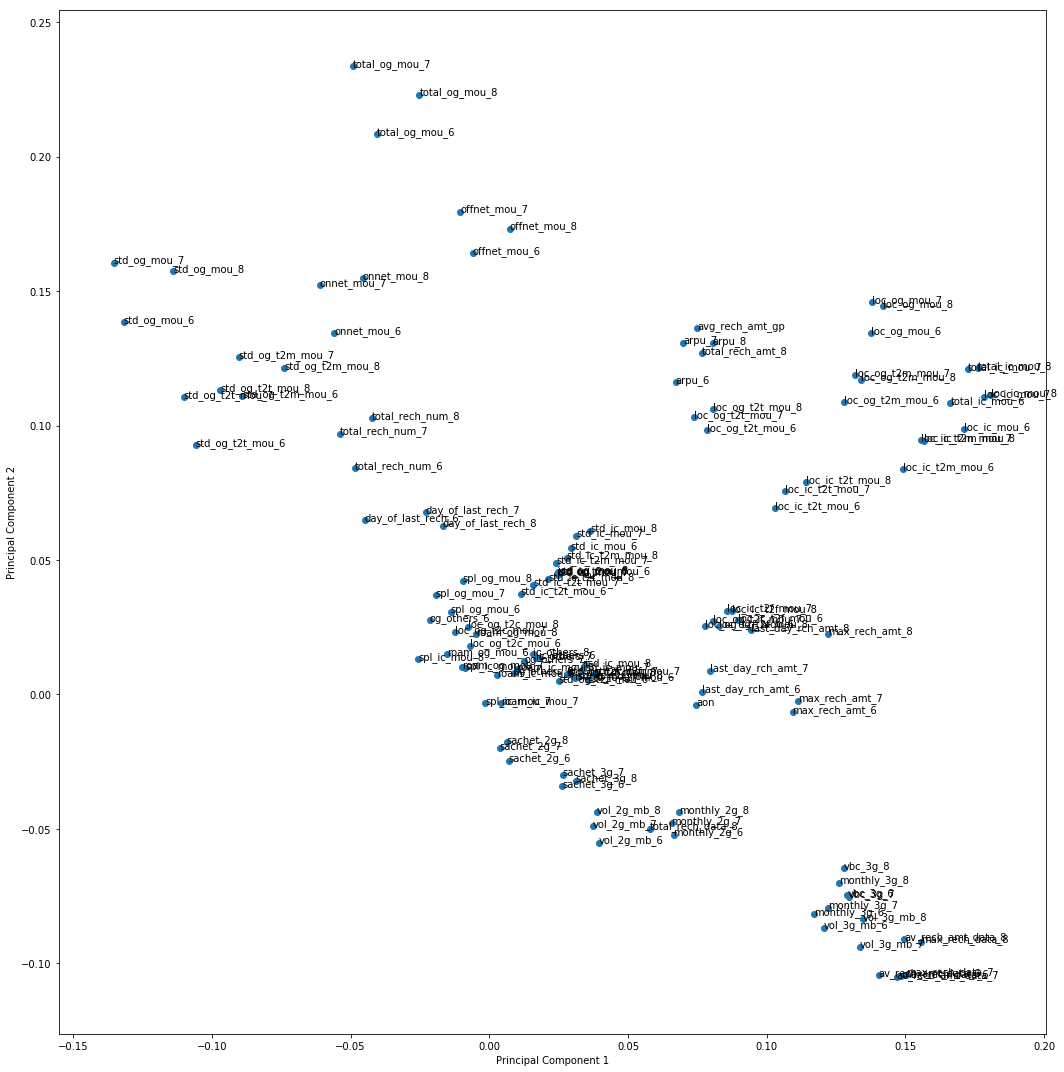

In [206]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

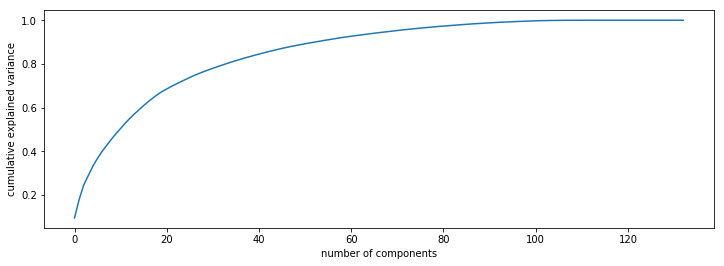

In [207]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

###### With the help of Scree Plot we can see that for number of components above 50 variance is more than 90%

In [208]:
#Import incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=50, whiten=False)

In [209]:
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(14695, 50)

###### Creating correlation matrix for the principal components - we expect little to no correlation

In [210]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

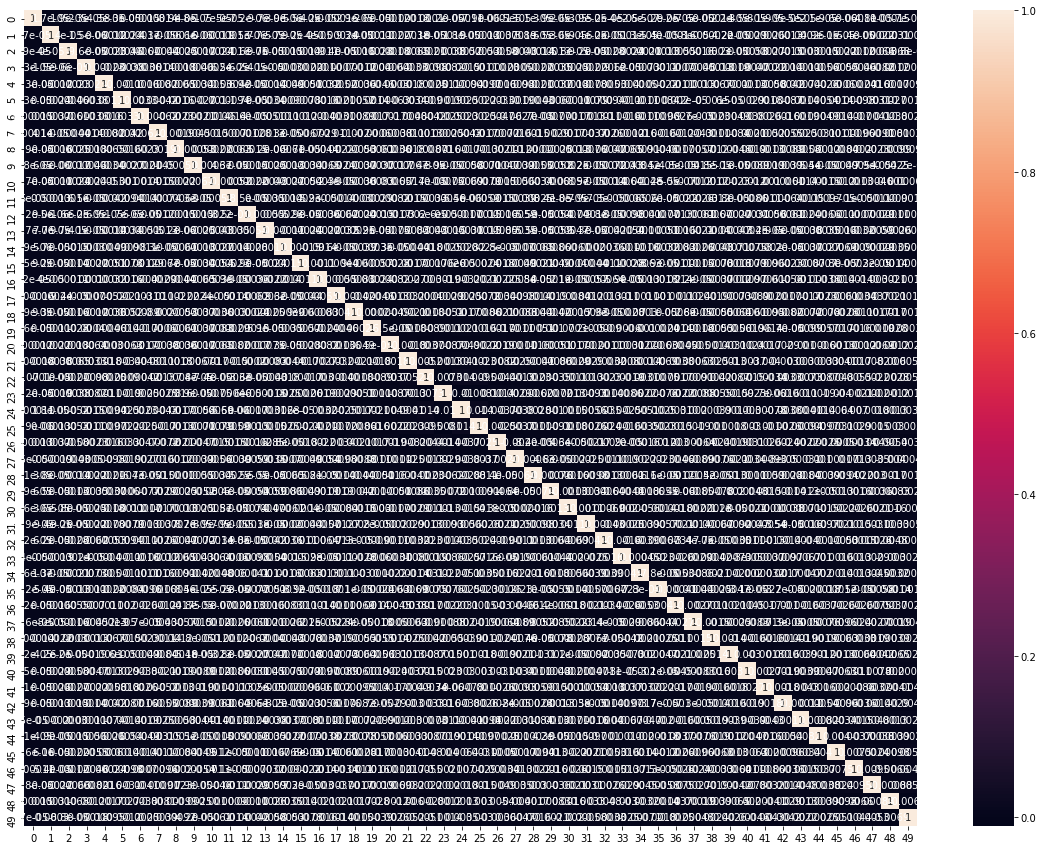

In [211]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,15))
sns.heatmap(corrmat,annot = True)

In [212]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.014315137831184085 , min corr:  -0.010706129576680346


In [213]:
#Applying selected components to the test data - 50 components
df_test_pca = pca_final.transform(x_test)
df_test_pca.shape

(8998, 50)

In [217]:
#Applying selected components to the validation data - 50 components
df_val_pca = pca_final.transform(x_val)
df_val_pca.shape

(6298, 50)

In [218]:
pca_again = PCA(0.90)

In [221]:
df_train_pca2 = pca_again.fit_transform(x_train)
print(df_train_pca2.shape)
# we see that PCA selected 54 components

(14695, 54)


In [222]:
df_test_pca2 = pca_again.transform(x_test)
df_test_pca2.shape

(8998, 54)

In [223]:
#Applying selected components to the validation data - 50 components
df_val_pca2 = pca_again.transform(x_val)
df_val_pca2.shape

(6298, 54)

In [224]:
def imp_metrix(y_test,y_pred):    
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    TP = cnf_matrix[1,1] # true positive 
    TN = cnf_matrix[0,0] # true negatives
    FP = cnf_matrix[0,1] # false positives
    FN = cnf_matrix[1,0] # false negatives
    sensitivity = TP/(FN+TP)
    specificity =  TN/(FP+TN)
    precision = TP/(FP+TP)
    fpr = FP/(TN+FP) # False Positive Rate
    ppv = TP/(TP+FP) # Positive predictive value
    npv = TN/(TN+FN) # Negative predictive value
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)
    print("Precision: ",precision)
    print("False Positive Rate: ", fpr)
    print("Positive predictive value: ",ppv)
    print("Negative predictive value: ",npv)
    print("AUC Score: ",metrics.roc_auc_score(y_test, y_pred))
    print("F1 Score: ",metrics.f1_score(y_test, y_pred))
    print("Accuracy Score: ",metrics.accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix")
    heatmap = sns.heatmap(cnf_matrix, annot=True, annot_kws={"size": 20}, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
    plt.ylabel('True', fontsize = 14)
    plt.xlabel('Predicted', fontsize = 14)

#### Logistic Regression

In [225]:
# let's start by building as basic logistic regression model
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression(class_weight='balanced')
model_pca = lsr.fit(df_train_pca2,y_train)

Sensitivity:  0.8312958435207825
Specificity:  0.8245721271393643
Precision:  0.3215130023640662
False Positive Rate:  0.1754278728606357
Positive predictive value:  0.3215130023640662
Negative predictive value:  0.9799506029347668
AUC Score:  0.8279339853300735
F1 Score:  0.4636890555744972
Accuracy Score:  0.8251833740831296

Confusion Matrix


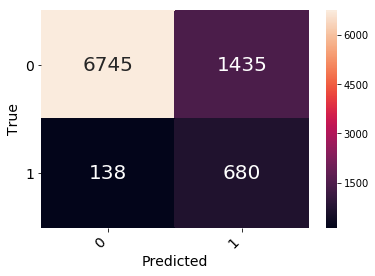

In [226]:
#Making prediction on the test data
pred_probs_test = lsr.predict_proba(df_test_pca2)[:,1]
y_pred = model_pca.predict(df_test_pca2)
imp_metrix(y_test,y_pred)

#### Plotting the ROC Curve

In [227]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [228]:
fpr, tpr, thresholds = metrics.roc_curve( y_test,y_pred, drop_intermediate = False )

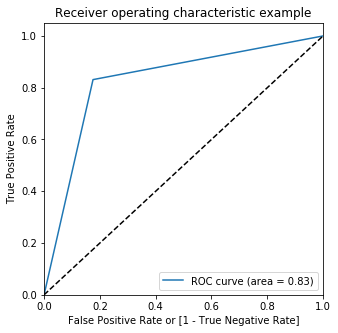

In [229]:
plot_roc(y_test,y_pred)

#### Finding Optimal Cutoff Point

In [230]:
y_pred_prob = pd.DataFrame(pred_probs_test)
y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_pred_prob.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_prob_df
y_pred_final = pd.concat([y_test_df,y_pred_prob],axis=1)

In [231]:
# renaming column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()


churn     ID  Churn_Prob
0      0  83339    0.037584
1      0  68510    0.689538
2      0  92632    0.761350
3      0  78687    0.060582
4      0  93703    0.101862

In [232]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churn','Churn_Prob'], axis=1)
y_pred_final.head()

ID  churn  Churn_Prob
0  83339      0    0.037584
1  68510      0    0.689538
2  92632      0    0.761350
3  78687      0    0.060582
4  93703      0    0.101862

In [233]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

ID  churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0  83339      0    0.037584    1    0    0    0    0    0    0    0    0    0
1  68510      0    0.689538    1    1    1    1    1    1    1    0    0    0
2  92632      0    0.761350    1    1    1    1    1    1    1    1    0    0
3  78687      0    0.060582    1    0    0    0    0    0    0    0    0    0
4  93703      0    0.101862    1    1    0    0    0    0    0    0    0    0

In [234]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','speci','sensi','preci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,speci,sensi,preci]
print(cutoff_df)

     prob  accuracy     speci     sensi     preci
0.0   0.0  0.090909  0.000000  1.000000  0.090909
0.1   0.1  0.430874  0.377384  0.965770  0.134285
0.2   0.2  0.581018  0.545477  0.936430  0.170830
0.3   0.3  0.679484  0.656357  0.910758  0.209505
0.4   0.4  0.761947  0.750856  0.872861  0.259448
0.5   0.5  0.825183  0.824572  0.831296  0.321513
0.6   0.6  0.867860  0.877506  0.771394  0.386405
0.7   0.7  0.896755  0.915281  0.711491  0.456471
0.8   0.8  0.912092  0.946944  0.563570  0.515084
0.9   0.9  0.917760  0.977751  0.317848  0.588235


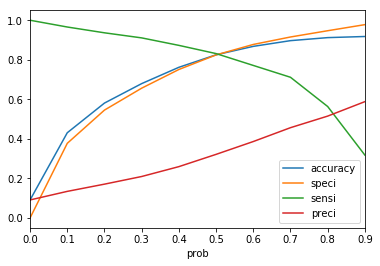

In [235]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi','preci'])

###### From the curve above 0.5 seems the optimim point to take it as a cutoff probability

In [236]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [237]:
y_pred_final.head()

ID  churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  83339      0    0.037584    1    0    0    0    0    0    0    0    0    0   
1  68510      0    0.689538    1    1    1    1    1    1    1    0    0    0   
2  92632      0    0.761350    1    1    1    1    1    1    1    1    0    0   
3  78687      0    0.060582    1    0    0    0    0    0    0    0    0    0   
4  93703      0    0.101862    1    1    0    0    0    0    0    0    0    0   

   final_predicted  
0                0  
1                1  
2                1  
3                0  
4                0

Sensitivity:  0.8312958435207825
Specificity:  0.8245721271393643
Precision:  0.3215130023640662
False Positive Rate:  0.1754278728606357
Positive predictive value:  0.3215130023640662
Negative predictive value:  0.9799506029347668
AUC Score:  0.8279339853300735
F1 Score:  0.4636890555744972
Accuracy Score:  0.8251833740831296

Confusion Matrix


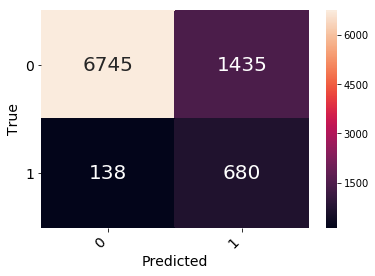

In [238]:
# Let's check the overall metrics again.
imp_metrix(y_pred_final.churn, y_pred_final.final_predicted)

#### Decision Tress

In [239]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5,class_weight="balanced")
dt_default.fit(df_train_pca2, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [240]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca2)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8180
           1       0.26      0.73      0.38       818

   micro avg       0.79      0.79      0.79      8998
   macro avg       0.61      0.76      0.63      8998
weighted avg       0.90      0.79      0.83      8998



Sensitivity:  0.726161369193154
Specificity:  0.7949877750611247
Precision:  0.261558784676354
False Positive Rate:  0.2050122249388753
Positive predictive value:  0.261558784676354
Negative predictive value:  0.9667013527575442
AUC Score:  0.7605745721271394
F1 Score:  0.3845904823567498
Accuracy Score:  0.7887308290731274

Confusion Matrix


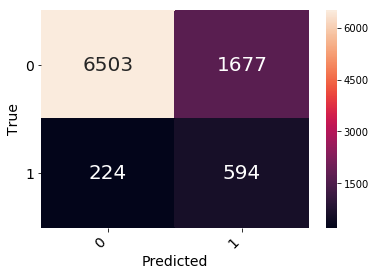

In [280]:
# Printing confusion matrix and accuracy
#print(confusion_matrix(y_test,y_pred_default))
#print(accuracy_score(y_test,y_pred_default))
imp_metrix(y_test,y_pred_default)

#### Plotting the Decision Tree

In [244]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(x_train.columns[0:54])
#features

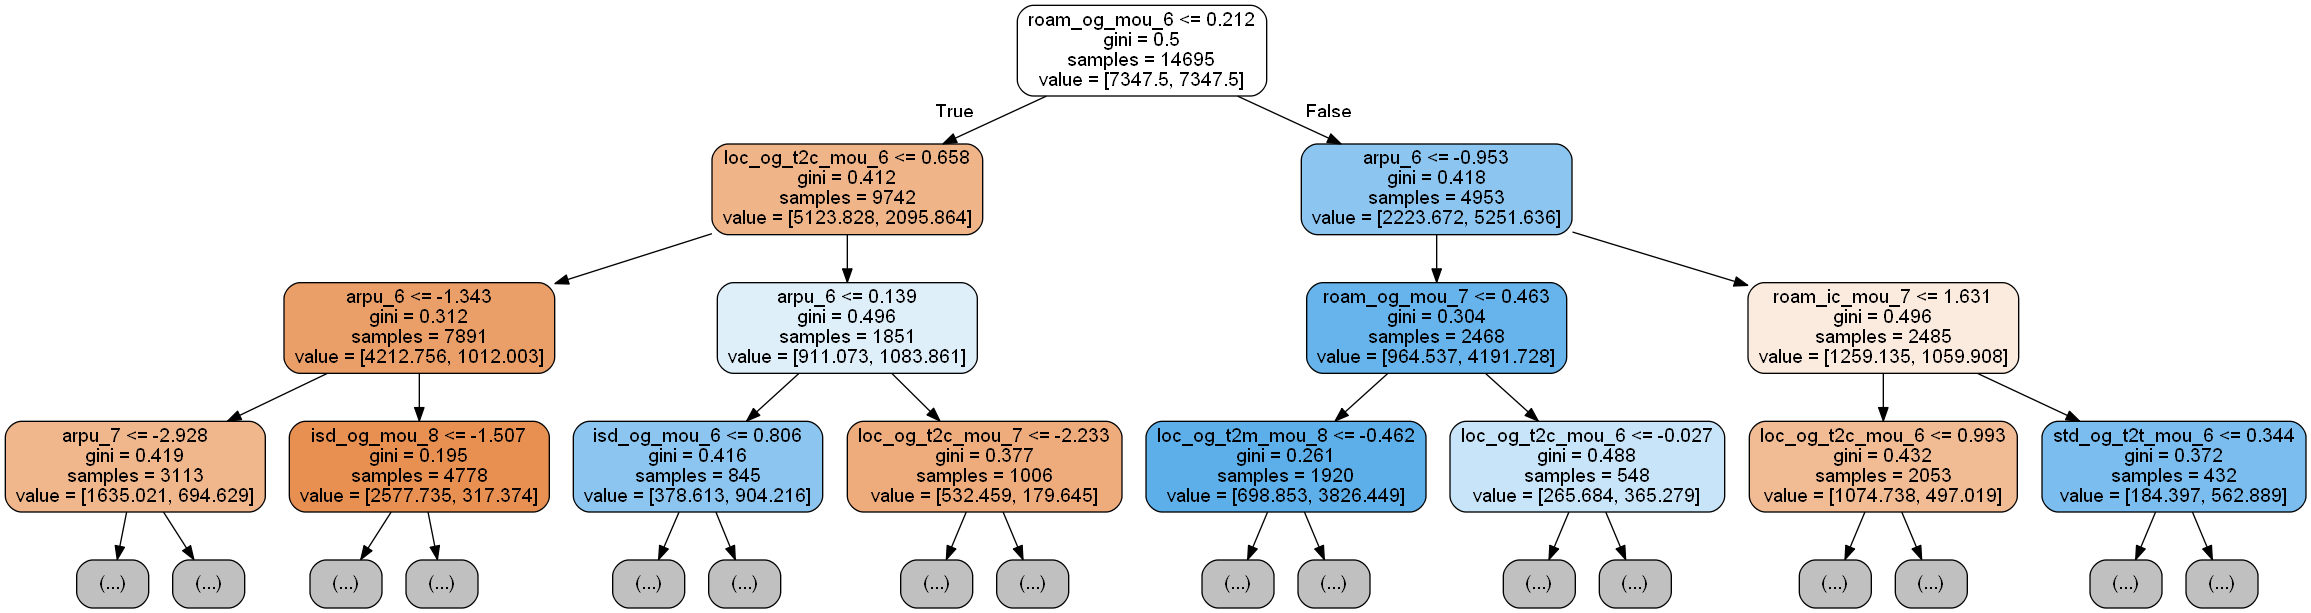

In [245]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True,max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Tuning max_depth 

In [246]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 53)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight="balanced",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 53)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [247]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.143511      0.013827         0.001599        0.000490   
1       0.235655      0.003966         0.001600        0.000489   
2       0.360376      0.015771         0.001800        0.000399   
3       0.469909      0.017280         0.002001        0.000001   
4       0.538067      0.032021         0.001601        0.000489   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.697619           0.705442   
1               2  {'max_depth': 2}           0.676871           0.700340   
2               3  {'max_depth': 3}           0.751701           0.795918   
3               4  {'max_depth': 4}           0.780612           0.802381   
4               5  {'max_depth': 5}           0.836054           0.792857   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.700578           0.672907  ...         0.696019        0.011855   
1           0.701259           0.687202  ...         0.704185        0.027083   
2           0.783600           0.723281  ...         0.769173        0.027663   
3           0.783260           0.772634  ...         0.790269        0.014780   
4           0.797550           0.744384  ...         0.796461        0.030059   

   rank_test_score  split0_train_score  split1_train_score  \
0               52            0.698086            0.716121   
1               51            0.683114            0.708805   
2               50            0.760698            0.800000   
3               48            0.786559            0.811229   
4               47            0.846618            0.813526   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.702620            0.676448            0.696606   
1            0.709595            0.700689            0.741941   
2            0.783260            0.738539            0.790168   
3            0.802399            0.787786            0.814664   
4            0.813032            0.772901            0.831079   

   mean_train_score  std_train_score  
0          0.697976         0.012776  
1          0.708829         0.019103  
2          0.774533         0.022164  
3          0.800527         0.011622  
4          0.815431         0.024640  

[5 rows x 21 columns]

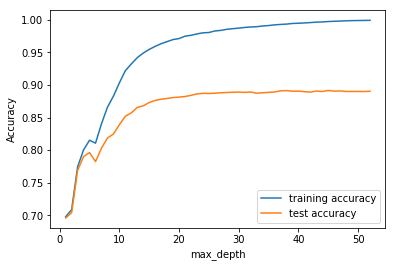

In [248]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###### You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 20, after which the test score stays same. Note that the scores are average accuracies across the 5-folds.

###### Thus, it is clear that the model is a good one where both test and train data stablizes after a certain point.

#### Tuning min_samples_leaf

In [249]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight="balanced", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [250]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.343753      0.174430         0.002199    3.998765e-04   
1       0.942615      0.086537         0.002000    7.835234e-07   
2       0.818510      0.036982         0.001600    4.890841e-04   
3       0.884817      0.111471         0.002199    7.476663e-04   
4       0.796130      0.063483         0.001999    6.309776e-04   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.854082   
1                     25  {'min_samples_leaf': 25}           0.807143   
2                     45  {'min_samples_leaf': 45}           0.783673   
3                     65  {'min_samples_leaf': 65}           0.795238   
4                     85  {'min_samples_leaf': 85}           0.783333   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.861905           0.852331           0.851259  ...   
1           0.794218           0.797210           0.800204  ...   
2           0.805442           0.778496           0.751872  ...   
3           0.787075           0.777135           0.760041  ...   
4           0.800340           0.784961           0.781144  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.855597        0.003987                1            0.943258   
1         0.795509        0.009406                2            0.851467   
2         0.778020        0.017453                5            0.814377   
3         0.775570        0.014558                7            0.820162   
4         0.784280        0.009269                3            0.800170   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.942407            0.944029            0.939866   
1            0.849426            0.847907            0.844603   
2            0.839047            0.806227            0.791869   
3            0.806635            0.805121            0.784554   
4            0.812590            0.814478            0.797312   

   split4_train_score  mean_train_score  std_train_score  
0            0.945649          0.943042         0.001914  
1            0.839160          0.846513         0.004306  
2            0.808965          0.812097         0.015395  
3            0.782598          0.799814         0.014269  
4            0.787361          0.802382         0.010067  

[5 rows x 21 columns]

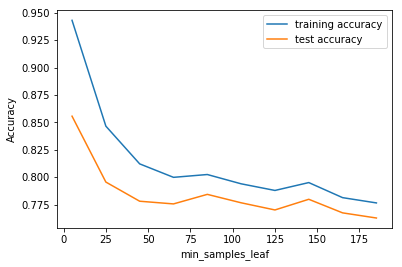

In [251]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


###### Since both test and train accuracy for min_samples_leaf follow similar trend from start to end, we could say that model is a stable one

#### Tuning min_samples_split

In [252]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [253]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.218580      0.137257         0.002200    7.476795e-04   
1       1.368889      0.284402         0.002200    3.997334e-04   
2       1.091852      0.049641         0.002000    5.309834e-07   
3       1.232419      0.141295         0.001801    3.985645e-04   
4       1.116160      0.078741         0.001808    4.040842e-04   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.892177   
1                      25  {'min_samples_split': 25}           0.858503   
2                      45  {'min_samples_split': 45}           0.828231   
3                      65  {'min_samples_split': 65}           0.811905   
4                      85  {'min_samples_split': 85}           0.798299   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.884694           0.891119           0.881892  ...   
1           0.840476           0.854372           0.847515  ...   
2           0.826871           0.825791           0.821988  ...   
3           0.815986           0.817285           0.792376  ...   
4           0.802721           0.796529           0.778761  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.887921        0.003958                1            0.994896   
1         0.849405        0.006346                2            0.944279   
2         0.822865        0.006079                3            0.902935   
3         0.809051        0.008987                4            0.868652   
4         0.794828        0.008298                5            0.846533   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.994811            0.995832            0.994727   
1            0.939090            0.945134            0.933316   
2            0.905742            0.899966            0.892745   
3            0.885496            0.881422            0.856426   
4            0.862782            0.853862            0.836523   

   split4_train_score  mean_train_score  std_train_score  
0            0.994982          0.995049         0.000400  
1            0.940376          0.940439         0.004227  
2            0.899974          0.900272         0.004333  
3            0.873947          0.873189         0.010212  
4            0.857021          0.851344         0.009080  

[5 rows x 21 columns]

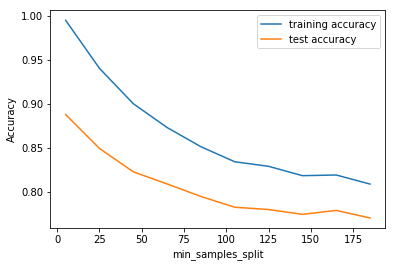

In [254]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Grid Search to Find Optimal Hyperparameters

###### We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG)

In [255]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight="balanced")
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca2, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [256]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.976732      0.045035         0.001601        0.000799   
1       1.135229      0.196990         0.002000        0.000631   
2       1.124557      0.167849         0.002201        0.000400   
3       0.931374      0.020087         0.001800        0.000399   
4       1.576423      0.238192         0.002398        0.000799   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                     50   
1         entropy               5                     50   
2         entropy               5                    100   
3         entropy               5                    100   
4         entropy              10                     50   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.836735  ...         0.797074        0.023460                1   
1           0.836735  ...         0.797074        0.023460                1   
2           0.795238  ...         0.786458        0.007922                7   
3           0.795238  ...         0.786458        0.007922                7   
4           0.790816  ...         0.768697        0.014856               16   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.841599            0.822629            0.796019   
1            0.841599            0.822629            0.796019   
2            0.806210            0.807571            0.794743   
3            0.806210            0.807571            0.794743   
4            0.815313            0.822288            0.798316   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.793230            0.800034          0.810702         0.018610  
1            0.793230            0.800034          0.810702         0.018610  
2            0.800204            0.793995          0.800545         0.005624  
3            0.800204            0.793995          0.800545         0.005624  
4            0.795781            0.797142          0.805768         0.010897  

[5 rows x 24 columns]

In [266]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.7970738346376318
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [258]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(class_weight="balanced", criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
clf_gini.fit(df_train_pca2, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [259]:
# accuracy score
clf_gini.score(df_test_pca2, y_test)

0.7980662369415426

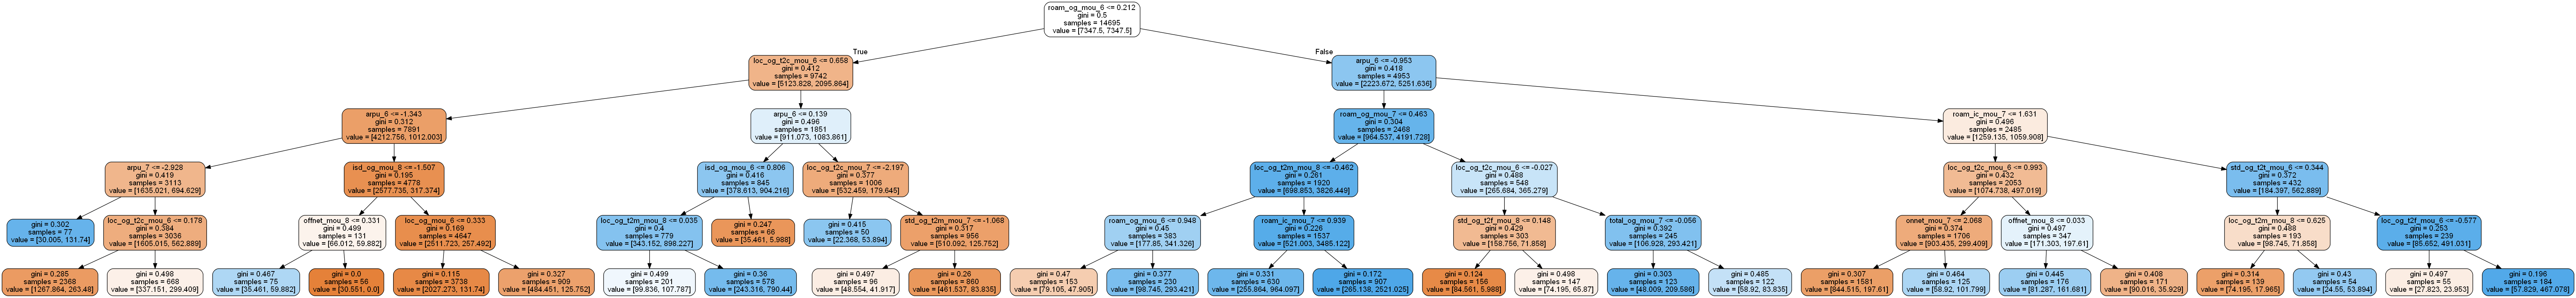

In [260]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [261]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = clf_gini.predict(df_test_pca2)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8180
           1       0.27      0.72      0.39       818

   micro avg       0.80      0.80      0.80      8998
   macro avg       0.62      0.76      0.64      8998
weighted avg       0.90      0.80      0.83      8998



Sensitivity:  0.7224938875305623
Specificity:  0.8056234718826406
Precision:  0.27097661623108665
False Positive Rate:  0.19437652811735942
Positive predictive value:  0.27097661623108665
Negative predictive value:  0.9667008948217691
AUC Score:  0.7640586797066016
F1 Score:  0.39413137712570856
Accuracy Score:  0.7980662369415426

Confusion Matrix


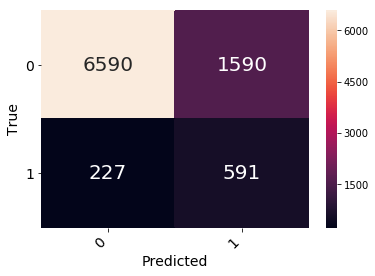

In [281]:
# Printing confusion matrix and accuracy
#print(confusion_matrix(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))
imp_metrix(y_test,y_pred)

#### Random Forest

In [267]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameter and balanced subsample to tackle class imbalance.
rfc = RandomForestClassifier(class_weight='balanced',max_depth=5,min_samples_leaf=50, min_samples_split=50)

In [268]:
rfc.fit(df_train_pca2,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [269]:
# Let's check the report of our default model on training data
print(classification_report(y_train,rfc.predict(df_train_pca2)))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91     13468
           1       0.33      0.78      0.46      1227

   micro avg       0.85      0.85      0.85     14695
   macro avg       0.65      0.82      0.69     14695
weighted avg       0.92      0.85      0.87     14695



In [271]:
# predict
y_val_pred = rfc.predict(df_val_pca2)

Sensitivity:  0.7815810920945395
Specificity:  0.8550638550638551
Precision:  0.3294400549639299
False Positive Rate:  0.14493614493614493
Positive predictive value:  0.3294400549639299
Negative predictive value:  0.9772572980312287
AUC Score:  0.8183224735791973
F1 Score:  0.4635089415176414
Accuracy Score:  0.8489282068730861

Confusion Matrix


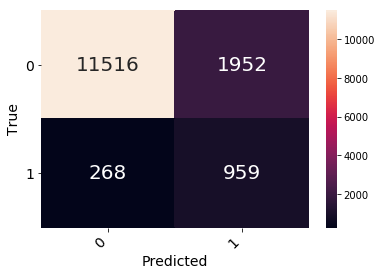

In [286]:
y_train_pred2=rfc.predict(df_train_pca2)
#print(accuracy_score(y_train, y_train_pred2))
imp_metrix(y_train, y_train_pred2)

In [289]:
#print(confusion_matrix(y_train, y_train_pred2))

In [283]:
#print(accuracy_score(y_val, y_val_pred))

Sensitivity:  0.7614678899082569
Specificity:  0.8583347818529463
Precision:  0.33739837398373984
False Positive Rate:  0.1416652181470537
Positive predictive value:  0.33739837398373984
Negative predictive value:  0.9743488555643252
AUC Score:  0.8099013358806016
F1 Score:  0.4676056338028169
Accuracy Score:  0.8499523658304223

Confusion Matrix


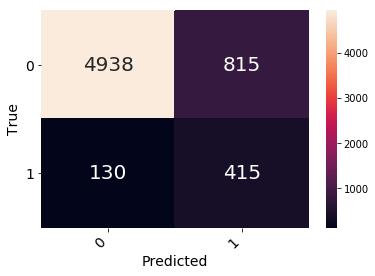

In [282]:
imp_metrix(y_val, y_val_pred)

###### Since Random Forest returns maximum accuracy, hence extracting features via Random forest

In [279]:
# predictors
# feature_importance
importance = rfc.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


variables  importance_percentage
0      roam_og_mou_6              23.387384
1      roam_ic_mou_7              14.944918
2             arpu_6               6.978103
3   loc_og_t2c_mou_6               5.795579
4   loc_og_t2t_mou_8               5.408115
5      roam_og_mou_7               4.121326
6   loc_og_t2m_mou_8               4.009035
7      roam_ic_mou_6               3.716970
8             arpu_7               3.547610
9   loc_og_t2c_mou_7               2.560454
10     roam_ic_mou_8               1.934238
11  std_og_t2t_mou_6               1.766129
12            arpu_8               1.758305
13       onnet_mou_6               1.560509
14  loc_og_t2f_mou_8               1.450491
15  loc_og_t2c_mou_8               1.389854
16       onnet_mou_7               1.316309
17     roam_og_mou_8               0.996475
18  std_og_t2f_mou_6               0.973182
19      offnet_mou_7               0.829404
20  std_og_t2t_mou_8               0.757361
21      offnet_mou_8               0.753093
22  loc_og_t2t_mou_7               0.733590
23      offnet_mou_6               0.724939
24  loc_og_t2m_mou_7               0.708545
25  std_og_t2f_mou_8               0.706322
26      spl_og_mou_8               0.695387
27      std_og_mou_6               0.663524
28  std_og_t2m_mou_7               0.618180
29  loc_og_t2t_mou_6               0.529713
30      loc_og_mou_8               0.482046
31      isd_og_mou_6               0.386199
32      spl_og_mou_6               0.383031
33    total_og_mou_8               0.381549
34       onnet_mou_8               0.372978
35  loc_og_t2m_mou_6               0.343704
36      spl_og_mou_7               0.334090
37  std_og_t2m_mou_8               0.329431
38      std_og_mou_8               0.325151
39       og_others_6               0.220452
40  loc_og_t2f_mou_7               0.178923
41      loc_og_mou_7               0.162197
42      isd_og_mou_7               0.116148
43  loc_og_t2f_mou_6               0.112189
44  std_og_t2m_mou_6               0.105134
45    total_og_mou_6               0.098751
46  std_og_t2t_mou_7               0.089146
47      loc_og_mou_6               0.080872
48      std_og_mou_7               0.076540
49    total_og_mou_7               0.054659
50       og_others_7               0.017679
51      isd_og_mou_8               0.014086
52       og_others_8               0.000000
53  std_og_t2f_mou_7               0.000000